# APRENDIZADO DE MÁQUINA

## Objetivo
Bloco de notas utilizado ao longo da disciplina que servirá de trabalho para a aprovação.

## Indice

1. [Regressão Linear Simples](#1)
2. [Regressão Linear Multipla](#2)
3. [Regressão Logística](#3)
4. [Árvore de Decisão](#4)
5. [Clusterização kmeans e Clusterização Hierárquicas](#5)
6. [Vizinhos mais próximos (kNN)](#6)
7. [Conclusão](#7)

## Regressão linear Simples <a class="anchor" id="1"></a>

O objetivo é ver a relação entre a bolsa de valores (Ibovespa) e o Dolar.

### Importação dos dados

Para importar os dados, utilizaremos a biblioteca do *Yahoo Finances* para podemos pegar os dados. 
Iremos pegar as cotações:

* Do Ibovespa;
* Dolar em relação ao Real;

In [2]:
import yfinance as yf

ibov = yf.Ticker('^BVSP')
dolar = yf.Ticker('USDBRL=X')

In [3]:
ibov_hist = ibov.history(period='max')
display('Serie historica do Ibovespa')
ibov_hist

'Serie historica do Ibovespa'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-27 00:00:00-03:00,24.799999,25.400000,24.500000,24.500000,0,0.0,0.0
1993-04-28 00:00:00-03:00,24.500000,24.600000,23.700001,24.299999,0,0.0,0.0
1993-04-29 00:00:00-03:00,24.299999,24.799999,23.700001,23.700001,0,0.0,0.0
1993-04-30 00:00:00-03:00,23.700001,24.200001,23.700001,24.100000,0,0.0,0.0
1993-05-03 00:00:00-03:00,24.100000,24.400000,23.799999,24.100000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-10 00:00:00-03:00,119036.000000,120823.000000,119036.000000,120636.000000,0,0.0,0.0
2023-11-13 00:00:00-03:00,120561.000000,120606.000000,119878.000000,120376.000000,11198000,0.0,0.0
2023-11-14 00:00:00-03:00,120411.000000,123370.000000,120411.000000,123328.000000,19427900,0.0,0.0


In [4]:
dolar_hist = dolar.history(period='max')
display('Serie historica do Dolar (em valor de Real)')
dolar_hist

'Serie historica do Dolar (em valor de Real)'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.946000,2.9460,2.923000,2.923000,0,0.0,0.0
2003-12-02 00:00:00+00:00,2.923000,2.9310,2.923000,2.931000,0,0.0,0.0
2003-12-03 00:00:00+00:00,2.931000,2.9360,2.926000,2.931000,0,0.0,0.0
2003-12-04 00:00:00+00:00,2.931000,2.9430,2.931000,2.943000,0,0.0,0.0
2003-12-05 00:00:00+00:00,2.943000,2.9480,2.934000,2.934000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,4.893379,4.9405,4.893379,4.893379,0,0.0,0.0
2023-11-14 00:00:00+00:00,4.906200,4.9078,4.848594,4.906200,0,0.0,0.0
2023-11-15 00:00:00+00:00,4.864500,4.8665,4.856525,4.864500,0,0.0,0.0


Primeiramente, iremos ver graficamente os dados dos indices, relacionando a data, com o valor de fechamento.

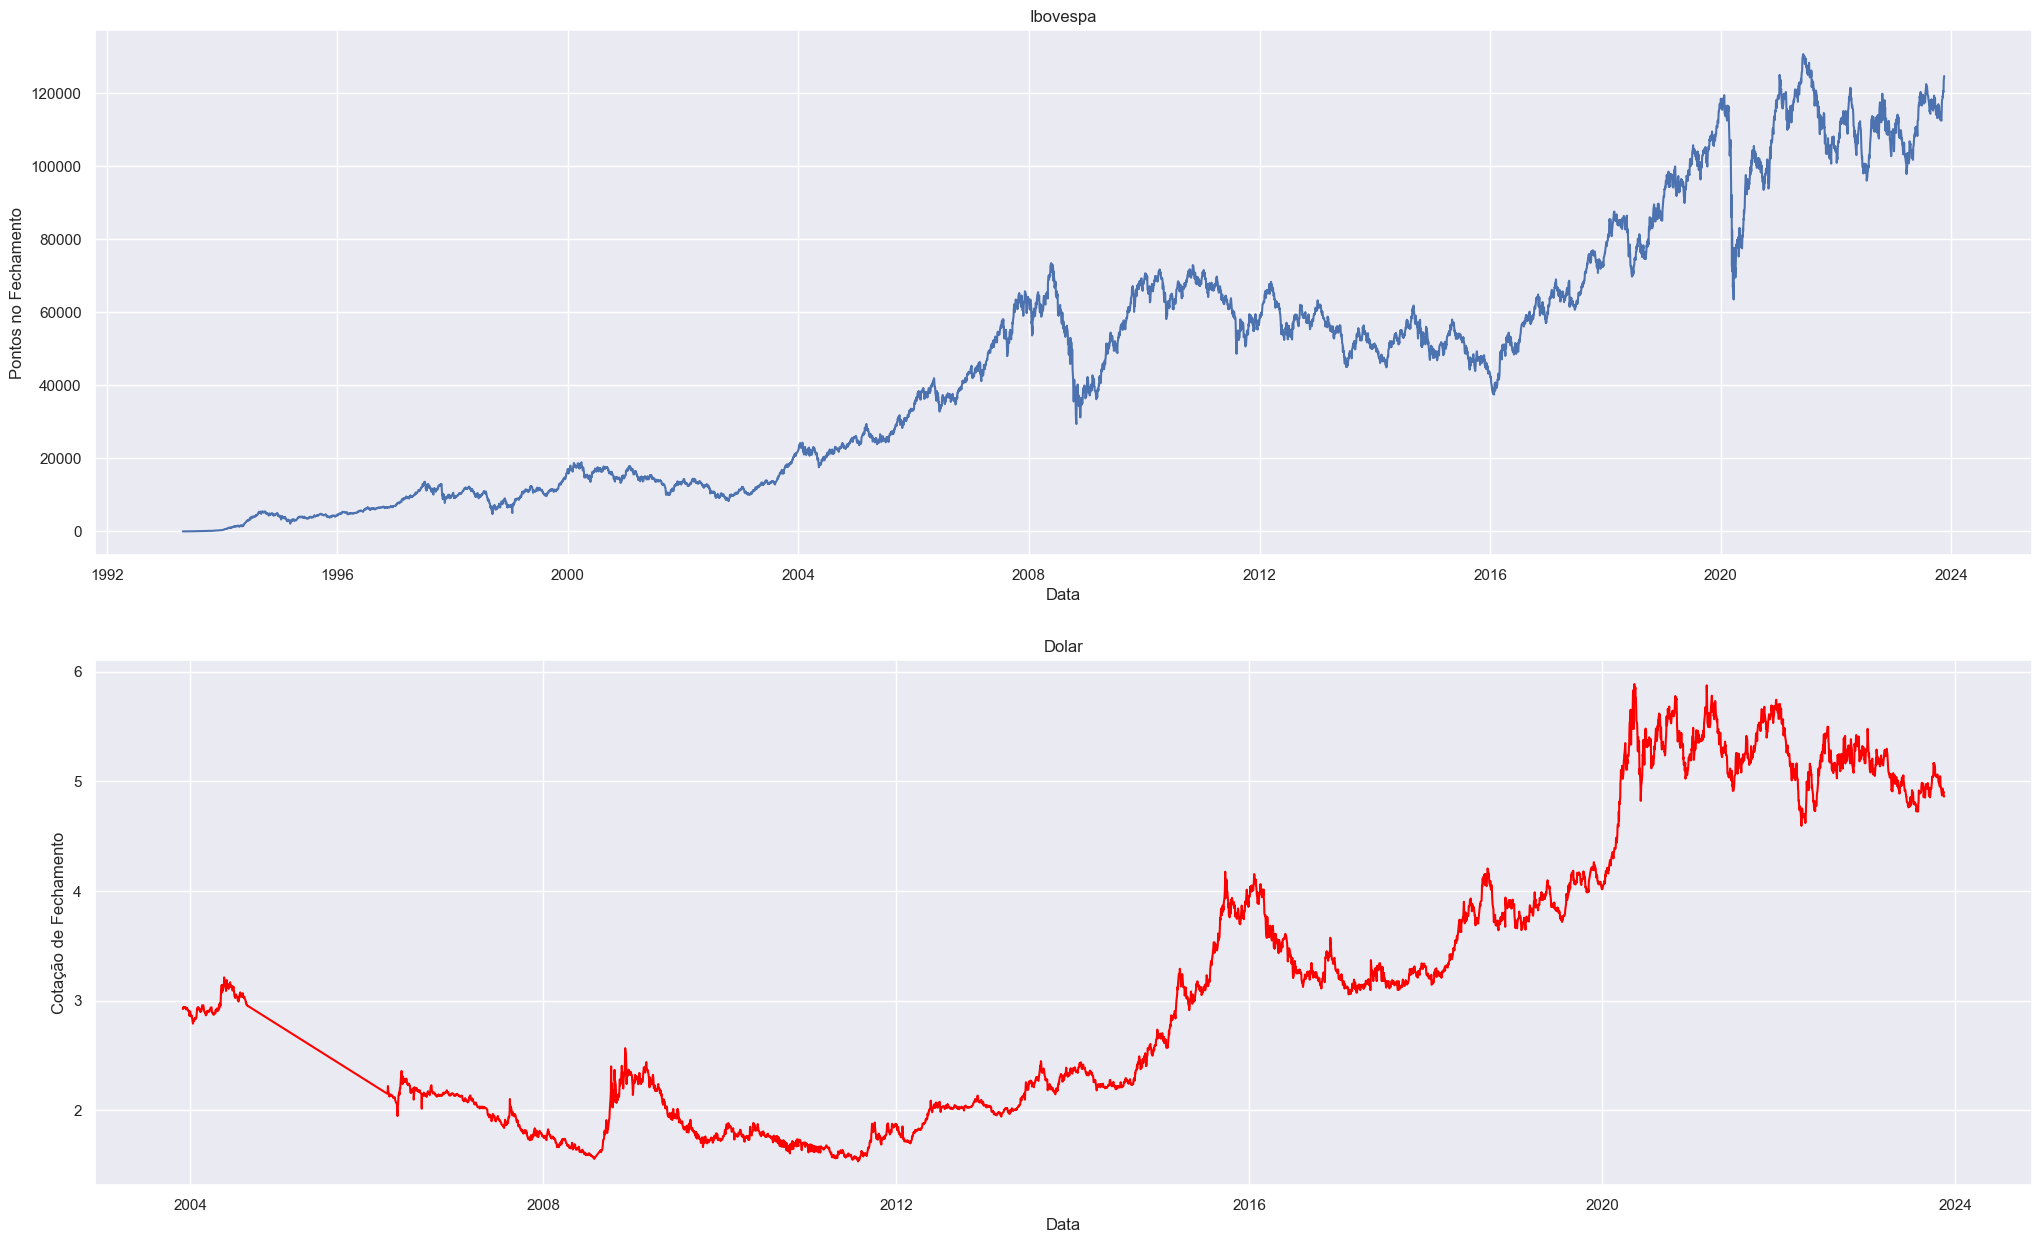

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(25, 15))
plt.subplot(2, 1, 1)
plt.title('Ibovespa')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(2, 1, 2)
plt.title('Dolar')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dolar_hist['Close'], color='red')

plt.show()

### Tratamento dos dados

Nesse passo, iremos fazer uma união dos dados, visando tirar linhas que não tenham todos os valores e garantir que estejam com a mesma data (uma unica referencia).

In [6]:
import pandas as pd

dolar_hist = dolar.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dolar_hist.index = dolar_hist.index.strftime('%Y-%m-%d')
dolar_hist = dolar_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_ibov_dolar = pd.merge(ibov_hist, dolar_hist, left_index=True, right_index=True)
df_ibov_dolar.columns =['IBOV', 'DOLAR']

df_ibov_dolar

,IBOV,DOLAR
Date,,
2003-12-01,20521.000000,2.923000
2003-12-02,20458.000000,2.931000
2003-12-03,20540.000000,2.931000
2003-12-04,20414.000000,2.943000
2003-12-05,20880.000000,2.934000
...,...,...
2023-11-10,120636.000000,4.933900
2023-11-13,120376.000000,4.893379
2023-11-14,123328.000000,4.906200


### Correlação entre os dados

Iremos agora, avaliar a correlação dos dados, no caso o fechamento do dolar e do ibovespa. Para isso, num primeiro momento vamos criar um **"mapa de calor"**.

<Axes: >

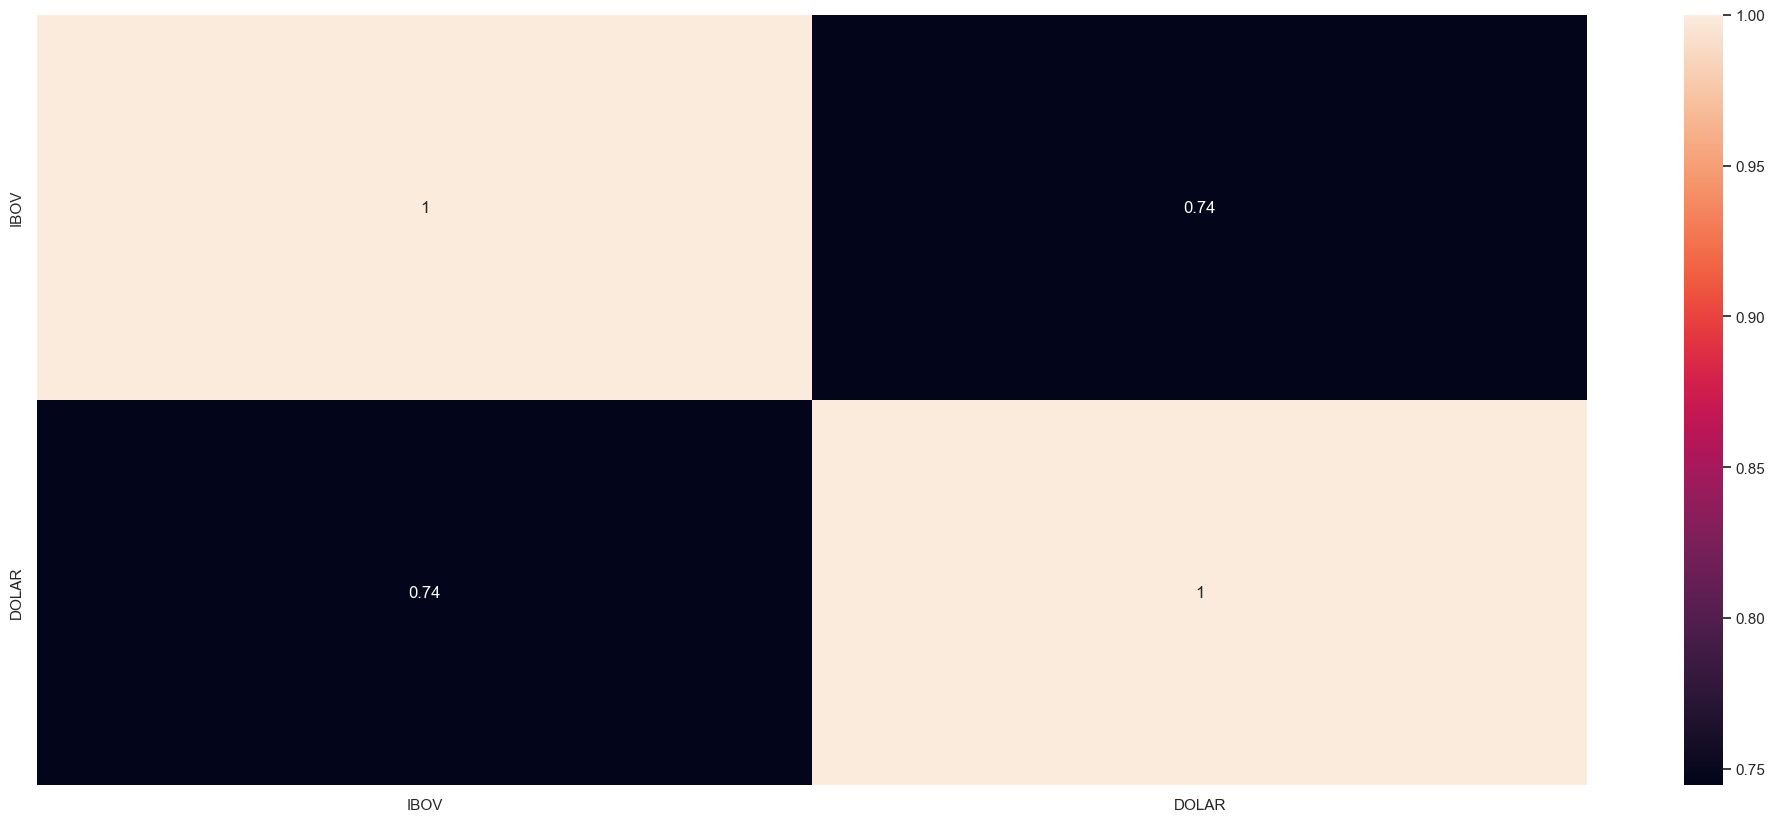

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(df_ibov_dolar.corr(), annot=True)

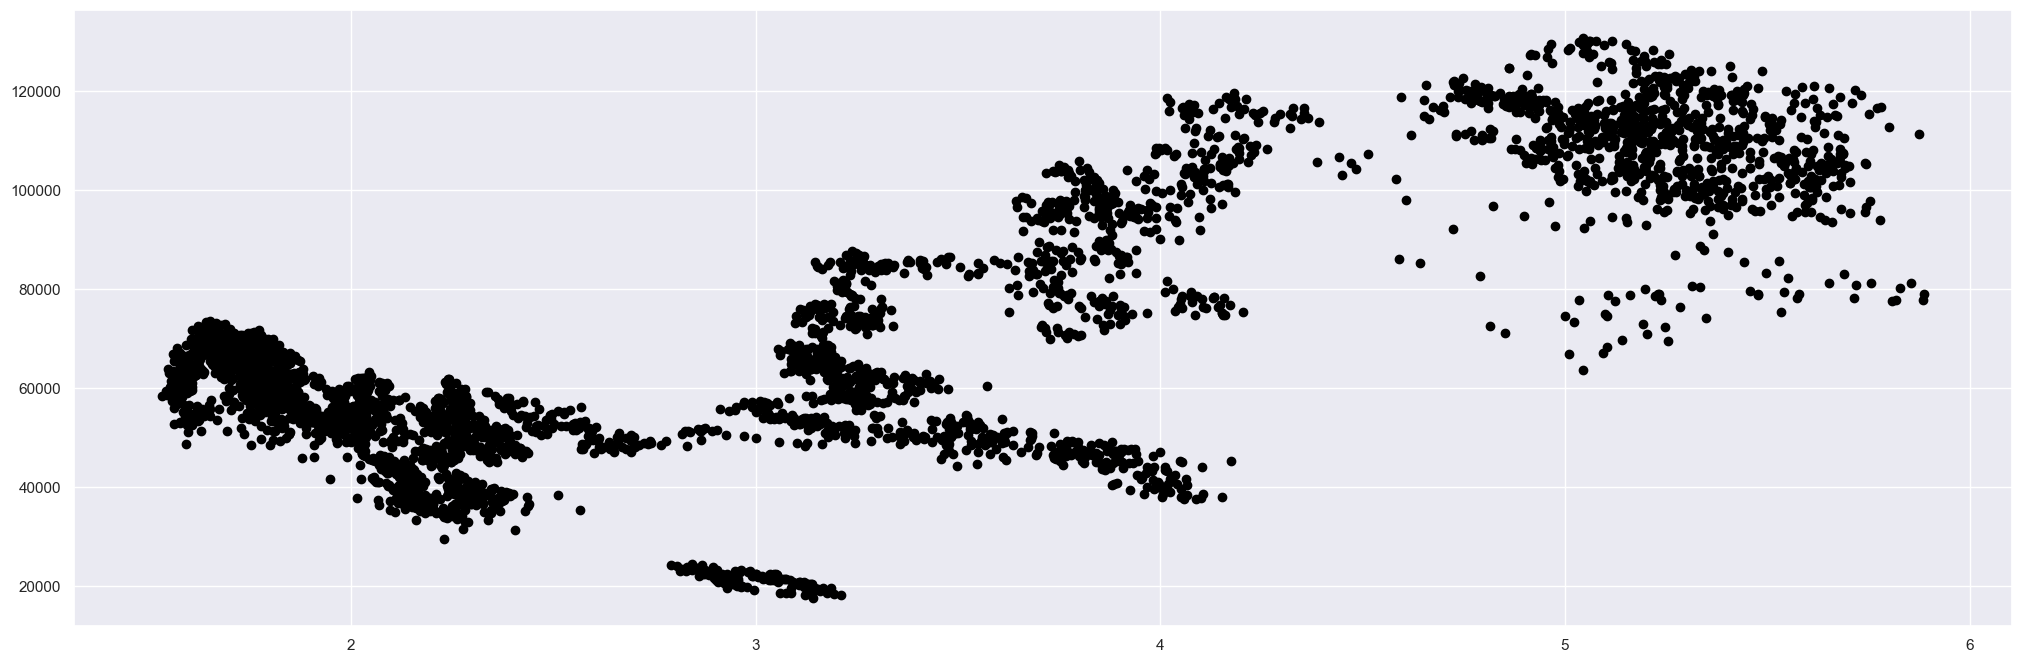

In [8]:
plt.figure(figsize=(25, 8))
plt.plot(df_ibov_dolar['DOLAR'], df_ibov_dolar['IBOV'],'o', color='black')

Para facilitar a visualização, será feita janelas de visualização de um ano. 


<Axes: xlabel='Date'>

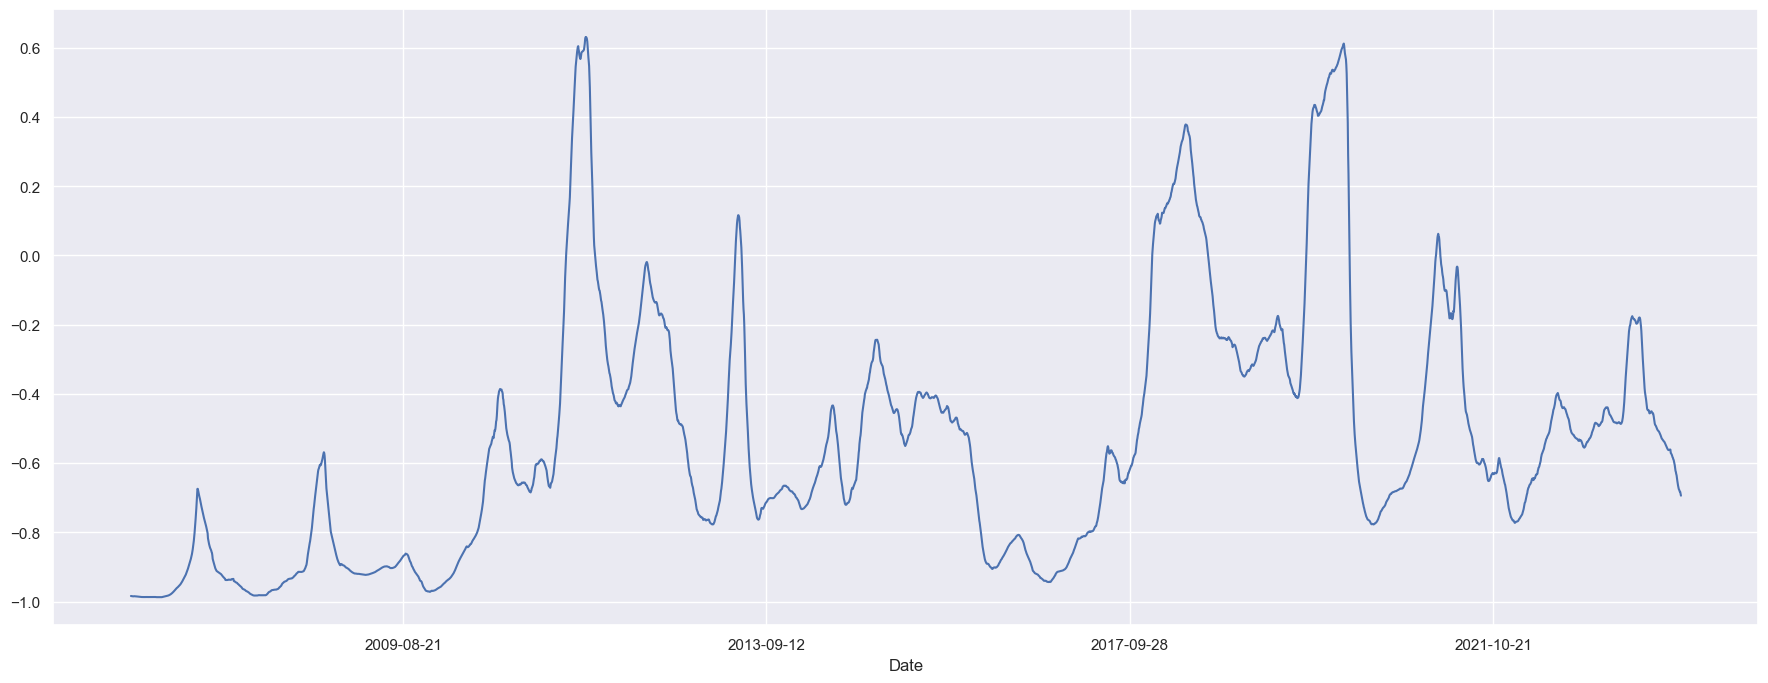

In [9]:
df_ibov_dolar['DOLAR'].rolling(252).corr(df_ibov_dolar['IBOV']).plot(figsize=(22,8))

De Maneira geral, o que vemos é que existe momentos que se tem alta correlação positiva e vales com alta correlação negativa. Lembrando que o ponto onde indica onde não existe correlação é o entorno do zero.

### Aplicando a Regressão Linear ao dados

Iremos dividir em dois momentos, no primeiro usaremos o *dataframe* todo e num segundo momento apenas uma janela. Para isso vamos usar a ferramenta do [*Scikit-learn*](https://scikit-learn.org/stable/).

#### Regressão Linear de todo o DataFrame

Como já temos os dados e base, basta:
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;

In [10]:
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def reg_linear(vet_indept, vet_dept):
    x_train , x_test , y_train , y_test = train_test_split(vet_indept, vet_dept, test_size=0.20, random_state=400)

    regr = linear_model.LinearRegression()

    regr.fit(x_train, y_train)

    y_pred =regr.predict(x_train)

    mean_squat_error = mean_squared_error(y_train, y_pred)
    coff_of_det = r2_score(y_train, y_pred)

    y_pred_test =regr.predict(x_test) 

    mean_squat_error_test = mean_squared_error(y_test, y_pred_test)
    coff_of_det_test = r2_score(y_test, y_pred_test)

    coeff = regr.coef_
    intercept = regr.intercept_

    #Plot outputs
    plt.figure(figsize=(25, 15))
    plt.subplot(2, 1, 1)
    plt.title('Treinamento')
    plt.ylabel('Dependente')
    plt.xlabel('Independente')
    plt.scatter(x_train, y_train, color="black")
    plt.plot(x_train, y_pred, color="blue", linewidth=3)

    plt.subplot(2, 1, 2)
    plt.title('Validação')
    plt.ylabel('Dependente')
    plt.xlabel('Independente')
    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_train, y_pred, color="red", linewidth=3)

    plt.show()
    dict_train = {'erro médio quadrático': mean_squat_error, 'coeficiente de determinação': coff_of_det}
    dict_test = {'erro médio quadrático': mean_squat_error_test, 'coeficiente de determinação': coff_of_det_test}
    dict_coff = {"coeff": coeff, "intercept": intercept}

    return dict([('Treinamento', dict_train), ('Validacao', dict_test), ('Coeficiente', dict_coff)])

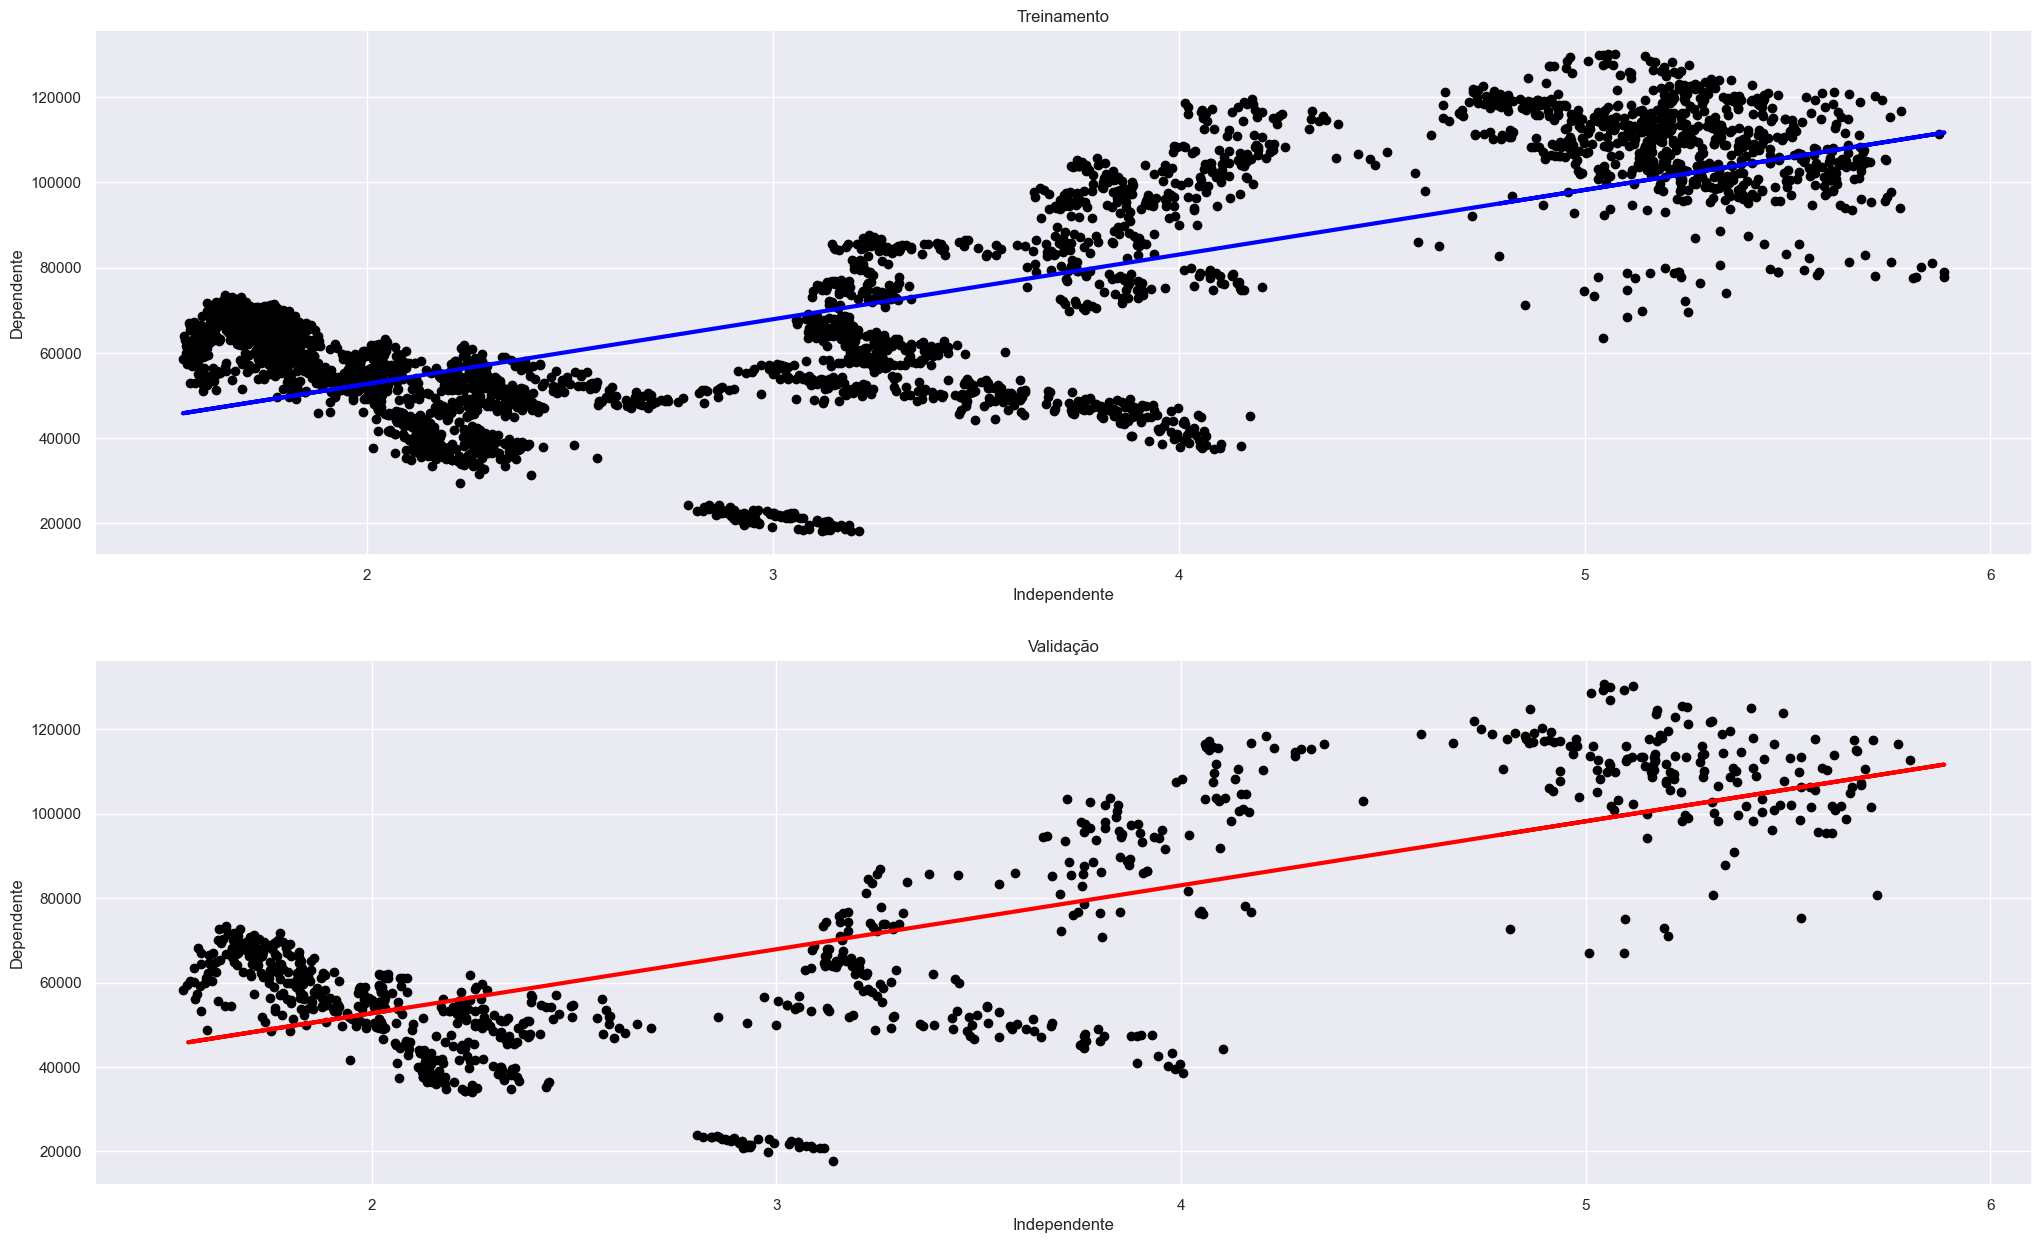

In [11]:
ret = reg_linear(df_ibov_dolar[['DOLAR']].to_numpy(), df_ibov_dolar[['IBOV']].to_numpy())

In [12]:
print('Valores para os dados de treinamento: ', ret['Treinamento'])
print('Valores para os dados de validadação: ', ret['Validacao'])

Valores para os dados de treinamento:  {'erro médio quadrático': 312116638.39376575, 'coeficiente de determinação': 0.5526655632241426}
Valores para os dados de validadação:  {'erro médio quadrático': 318610200.9238932, 'coeficiente de determinação': 0.5614291391967705}


Como vimos, para um tempo muito grande, a resposta é pouco signficativa, devido a alta dispersão do dados.

#### Regressão Linear para pedaços do DataFrame

Iremos pegar duas amostras menores de tempo e avaliarmos se conseguimos ter melhores respostas para menores periodos de tempo. Com isso iremos:
* Separar em dois conjuntos;
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;


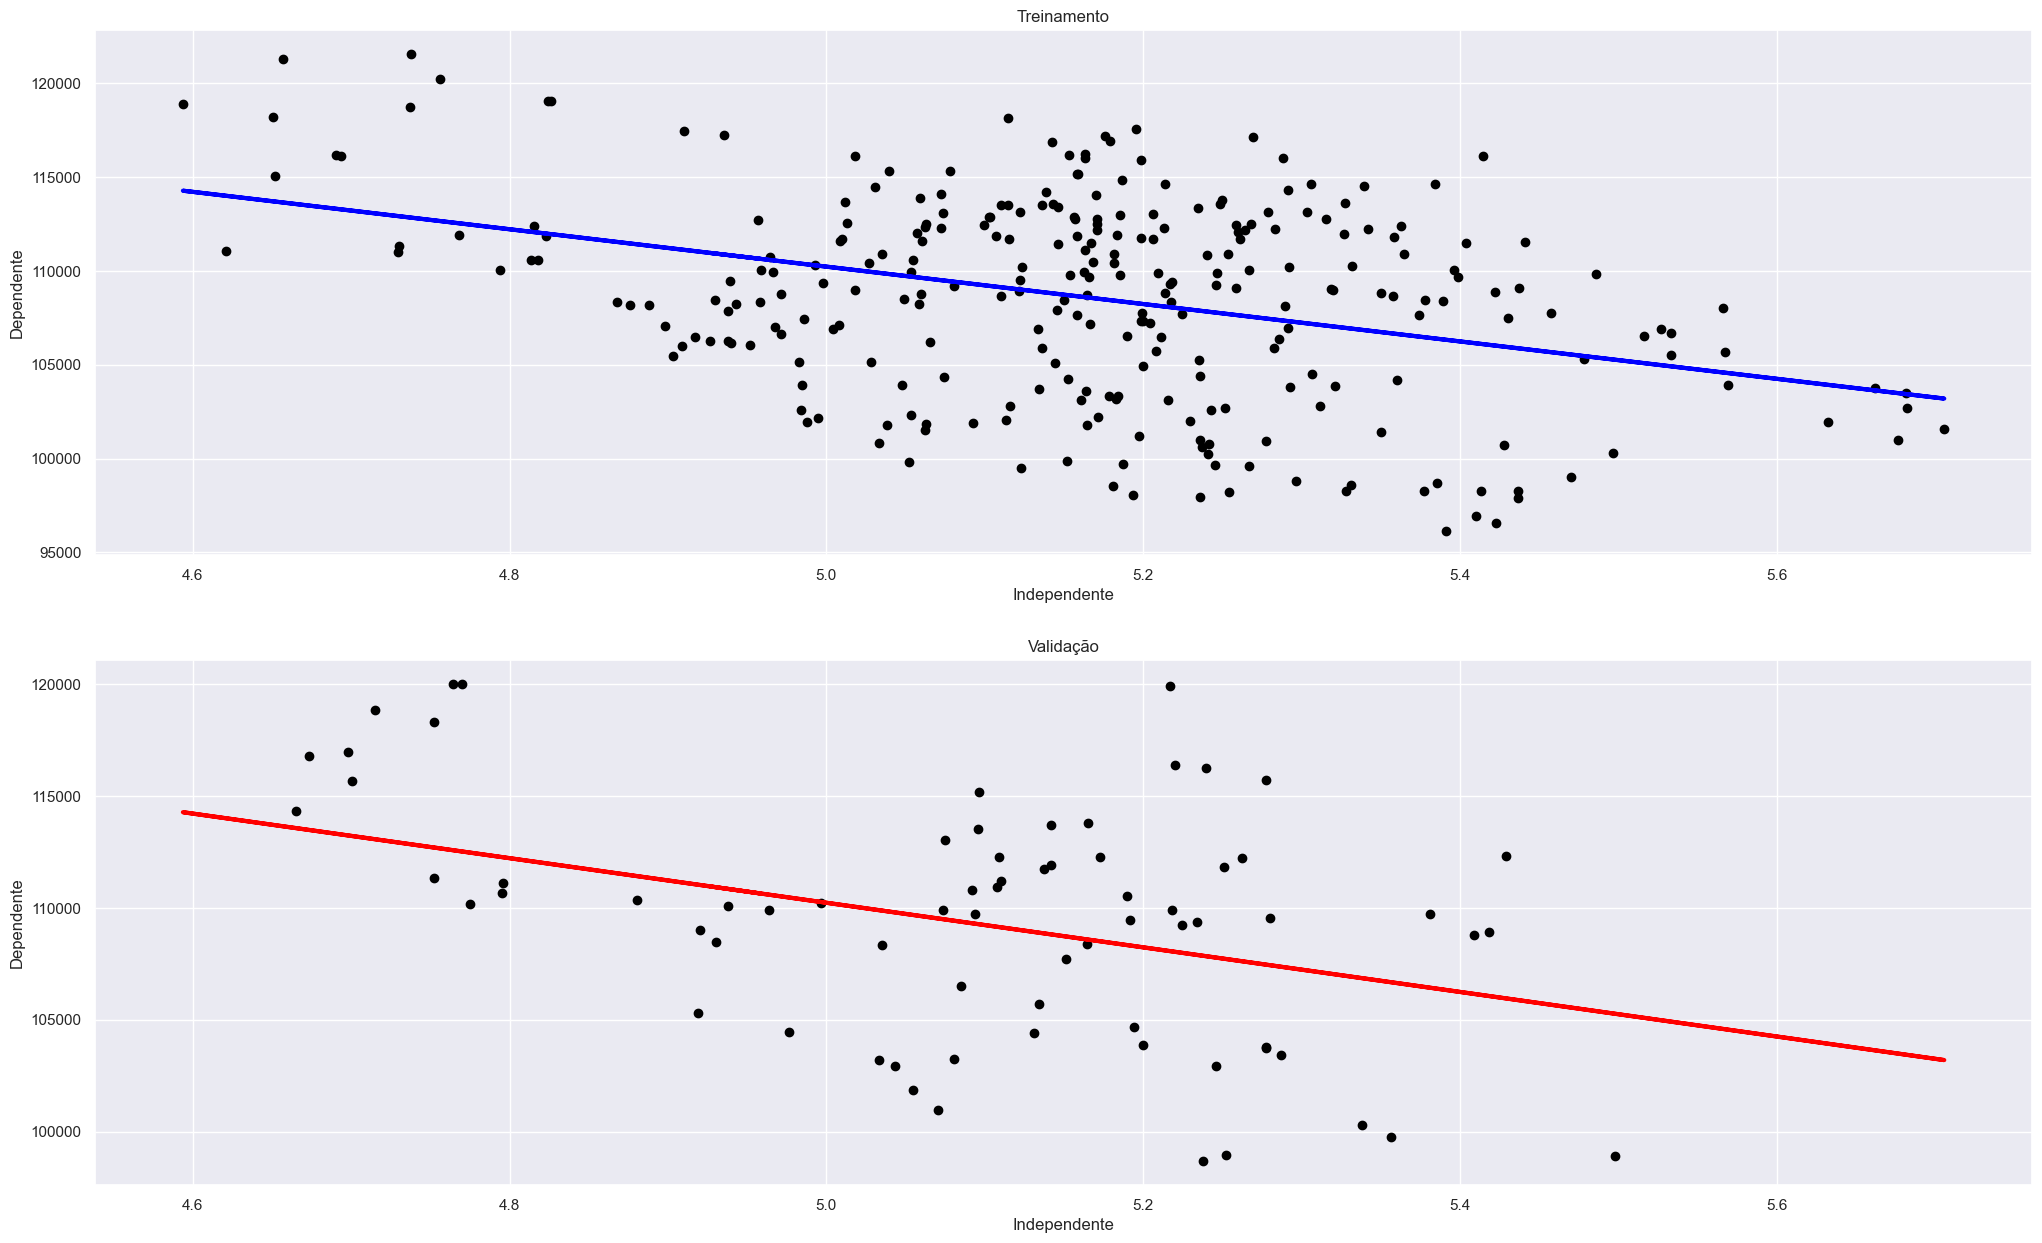

In [13]:
new_df = df_ibov_dolar.loc['2022-01-03':'2023-06-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())

In [14]:
print('Valores para os dados de treinamento: ', ret['Treinamento'])
print('Valores para os dados de validadação: ', ret['Validacao'])

Valores para os dados de treinamento:  {'erro médio quadrático': 24593893.850254197, 'coeficiente de determinação': 0.1391532575720611}
Valores para os dados de validadação:  {'erro médio quadrático': 22757793.532578774, 'coeficiente de determinação': 0.19424372890823172}


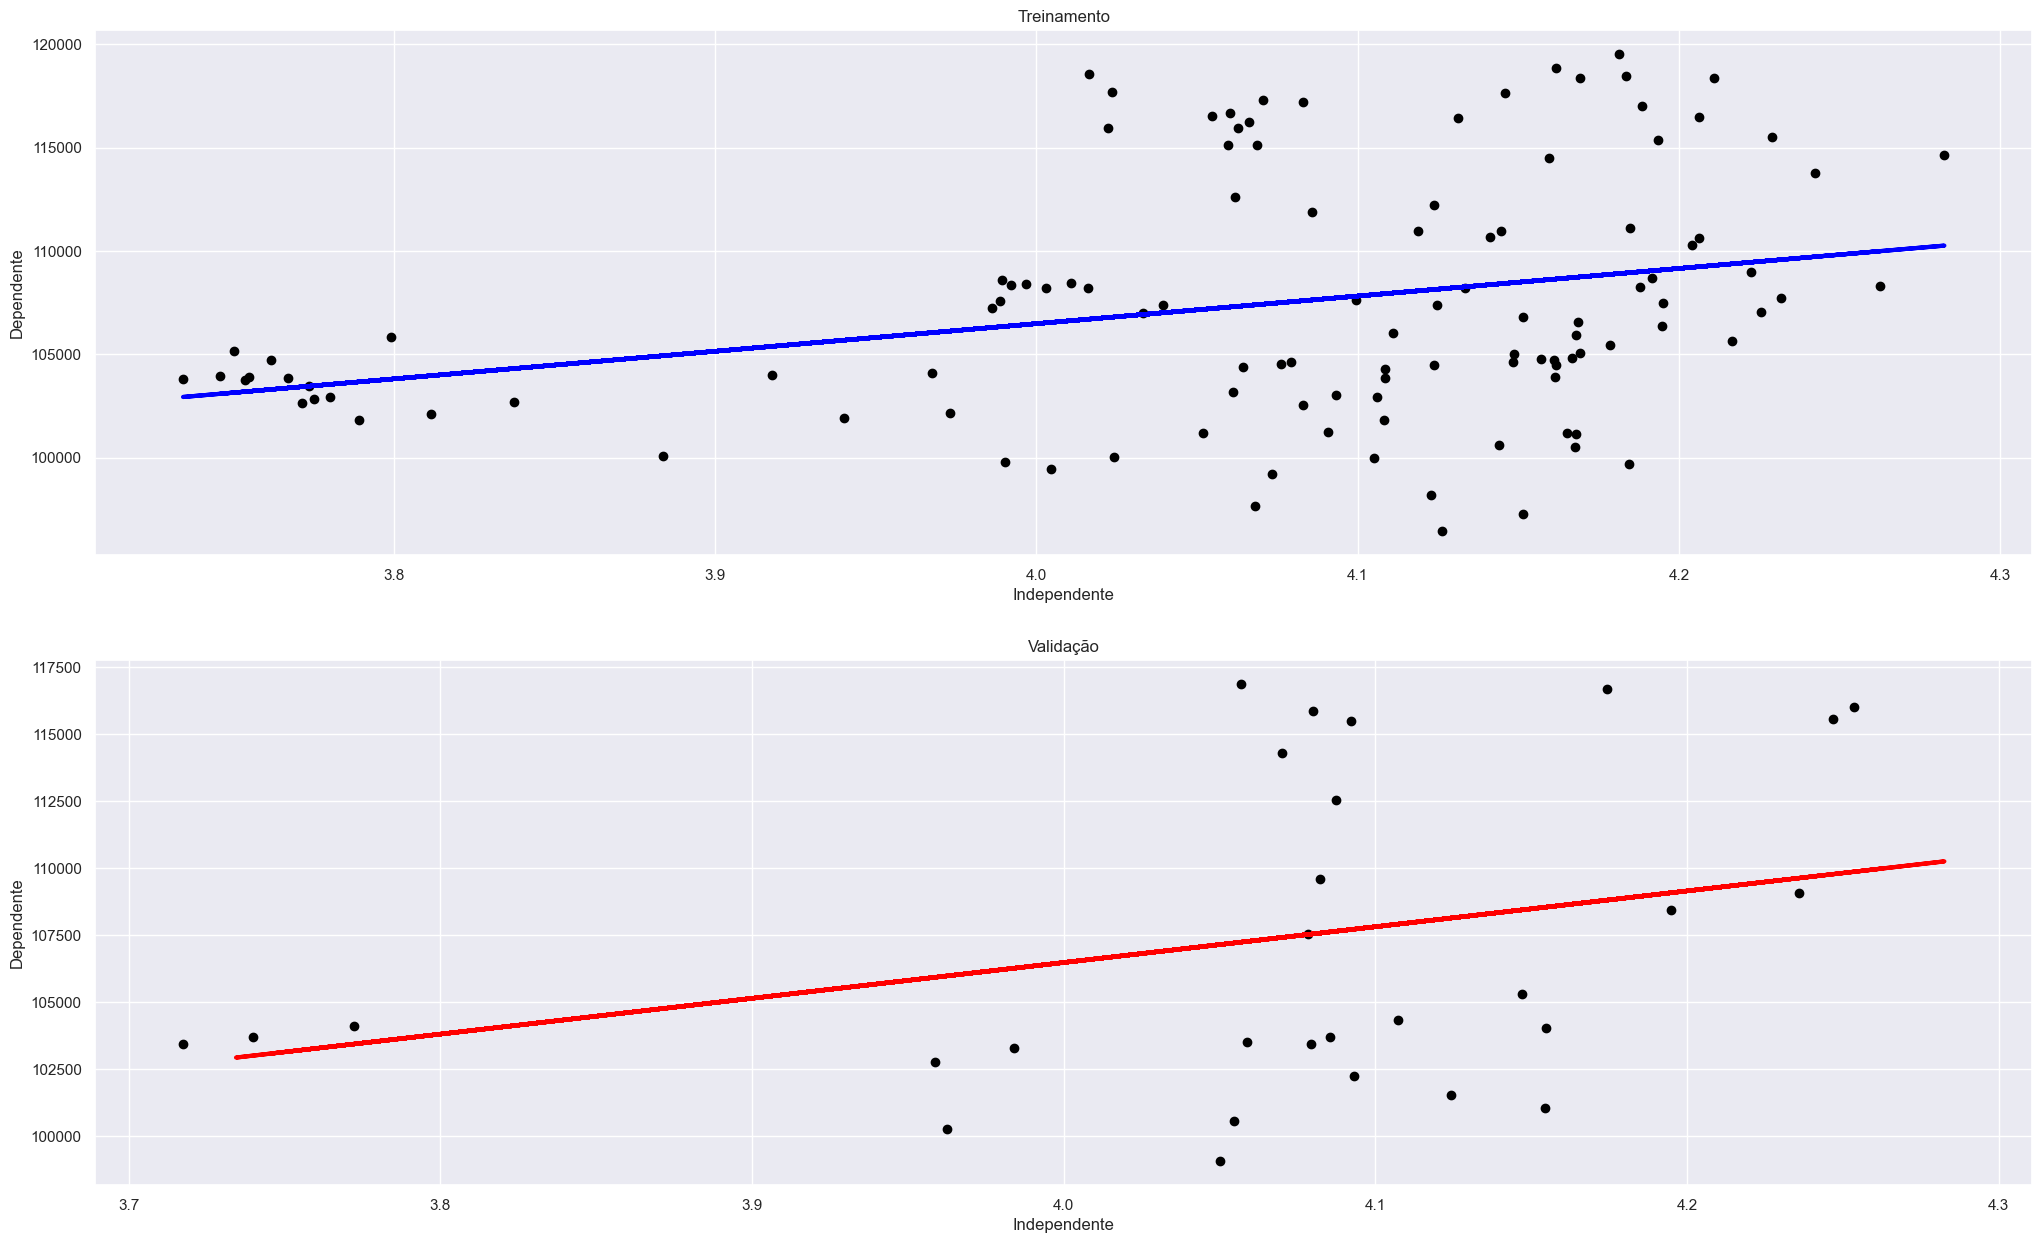

In [15]:
new_df = df_ibov_dolar.loc['2019-07-10':'2020-02-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())

In [16]:
print('Valores para os dados de treinamento: ', ret['Treinamento'])
print('Valores para os dados de validadação: ', ret['Validacao'])

Valores para os dados de treinamento:  {'erro médio quadrático': 31036684.822713885, 'coeficiente de determinação': 0.09659661007962106}
Valores para os dados de validadação:  {'erro médio quadrático': 28108046.584453043, 'coeficiente de determinação': 0.1427544759235727}


### Discussão

Como podemos ver, para intervalos de tempo menores o coeficiente de detimação apresentou resultados melhores (com excessão do periodo diretamente relacionado com a pandemia). Já o erro médio quadrádico deram valores bem grandes, isso se deve a alta variabilidade (ou escala dos dados).

A Discussão é que com apenas esses dois dados, apesar de serem relacionados, não conseguimos ter um bom resultado. 

## Regressão Linear Multipla <a class="anchor" id="2"></a>

Agora iremos ver a relação entre bolsas estrangeiras sobre a bolsa do Brasil (Ibovespa). Para isso iremos importar os dados da NASDAQ e do Dow Jones.

In [17]:
nasdaq = yf.Ticker('^IXIC')
dow_jones = yf.Ticker('^DJI')

ibov_hist = ibov.history(period='max')
display('Serie historica do Ibovespa')
ibov_hist

'Serie historica do Ibovespa'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-27 00:00:00-03:00,24.799999,25.400000,24.500000,24.500000,0,0.0,0.0
1993-04-28 00:00:00-03:00,24.500000,24.600000,23.700001,24.299999,0,0.0,0.0
1993-04-29 00:00:00-03:00,24.299999,24.799999,23.700001,23.700001,0,0.0,0.0
1993-04-30 00:00:00-03:00,23.700001,24.200001,23.700001,24.100000,0,0.0,0.0
1993-05-03 00:00:00-03:00,24.100000,24.400000,23.799999,24.100000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-10 00:00:00-03:00,119036.000000,120823.000000,119036.000000,120636.000000,0,0.0,0.0
2023-11-13 00:00:00-03:00,120561.000000,120606.000000,119878.000000,120376.000000,11198000,0.0,0.0
2023-11-14 00:00:00-03:00,120411.000000,123370.000000,120411.000000,123328.000000,19427900,0.0,0.0


In [18]:
nasdaq_hist = nasdaq.history(period='max')
display('Serie historica da Nasdaq')
nasdaq_hist

'Serie historica da Nasdaq'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,13745.959961,13805.110352,13687.780273,13767.740234,4349590000,0.0,0.0
2023-11-14 00:00:00-05:00,14015.370117,14124.059570,14003.139648,14094.379883,5332490000,0.0,0.0
2023-11-15 00:00:00-05:00,14147.269531,14194.360352,14060.700195,14103.839844,5063830000,0.0,0.0


In [19]:
dow_jones_hist = dow_jones.history(period='max')
display('Serie historica do Dow Jones')
dow_jones_hist

'Serie historica do Dow Jones'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-01-02 00:00:00-05:00,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0.0,0.0
1992-01-03 00:00:00-05:00,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0.0,0.0
1992-01-06 00:00:00-05:00,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0.0,0.0
1992-01-07 00:00:00-05:00,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0.0,0.0
1992-01-08 00:00:00-05:00,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,34259.250000,34405.839844,34205.808594,34337.871094,245090000,0.0,0.0
2023-11-14 00:00:00-05:00,34581.199219,34931.011719,34581.199219,34827.699219,328050000,0.0,0.0
2023-11-15 00:00:00-05:00,34906.718750,35051.101562,34868.480469,34991.210938,347790000,0.0,0.0


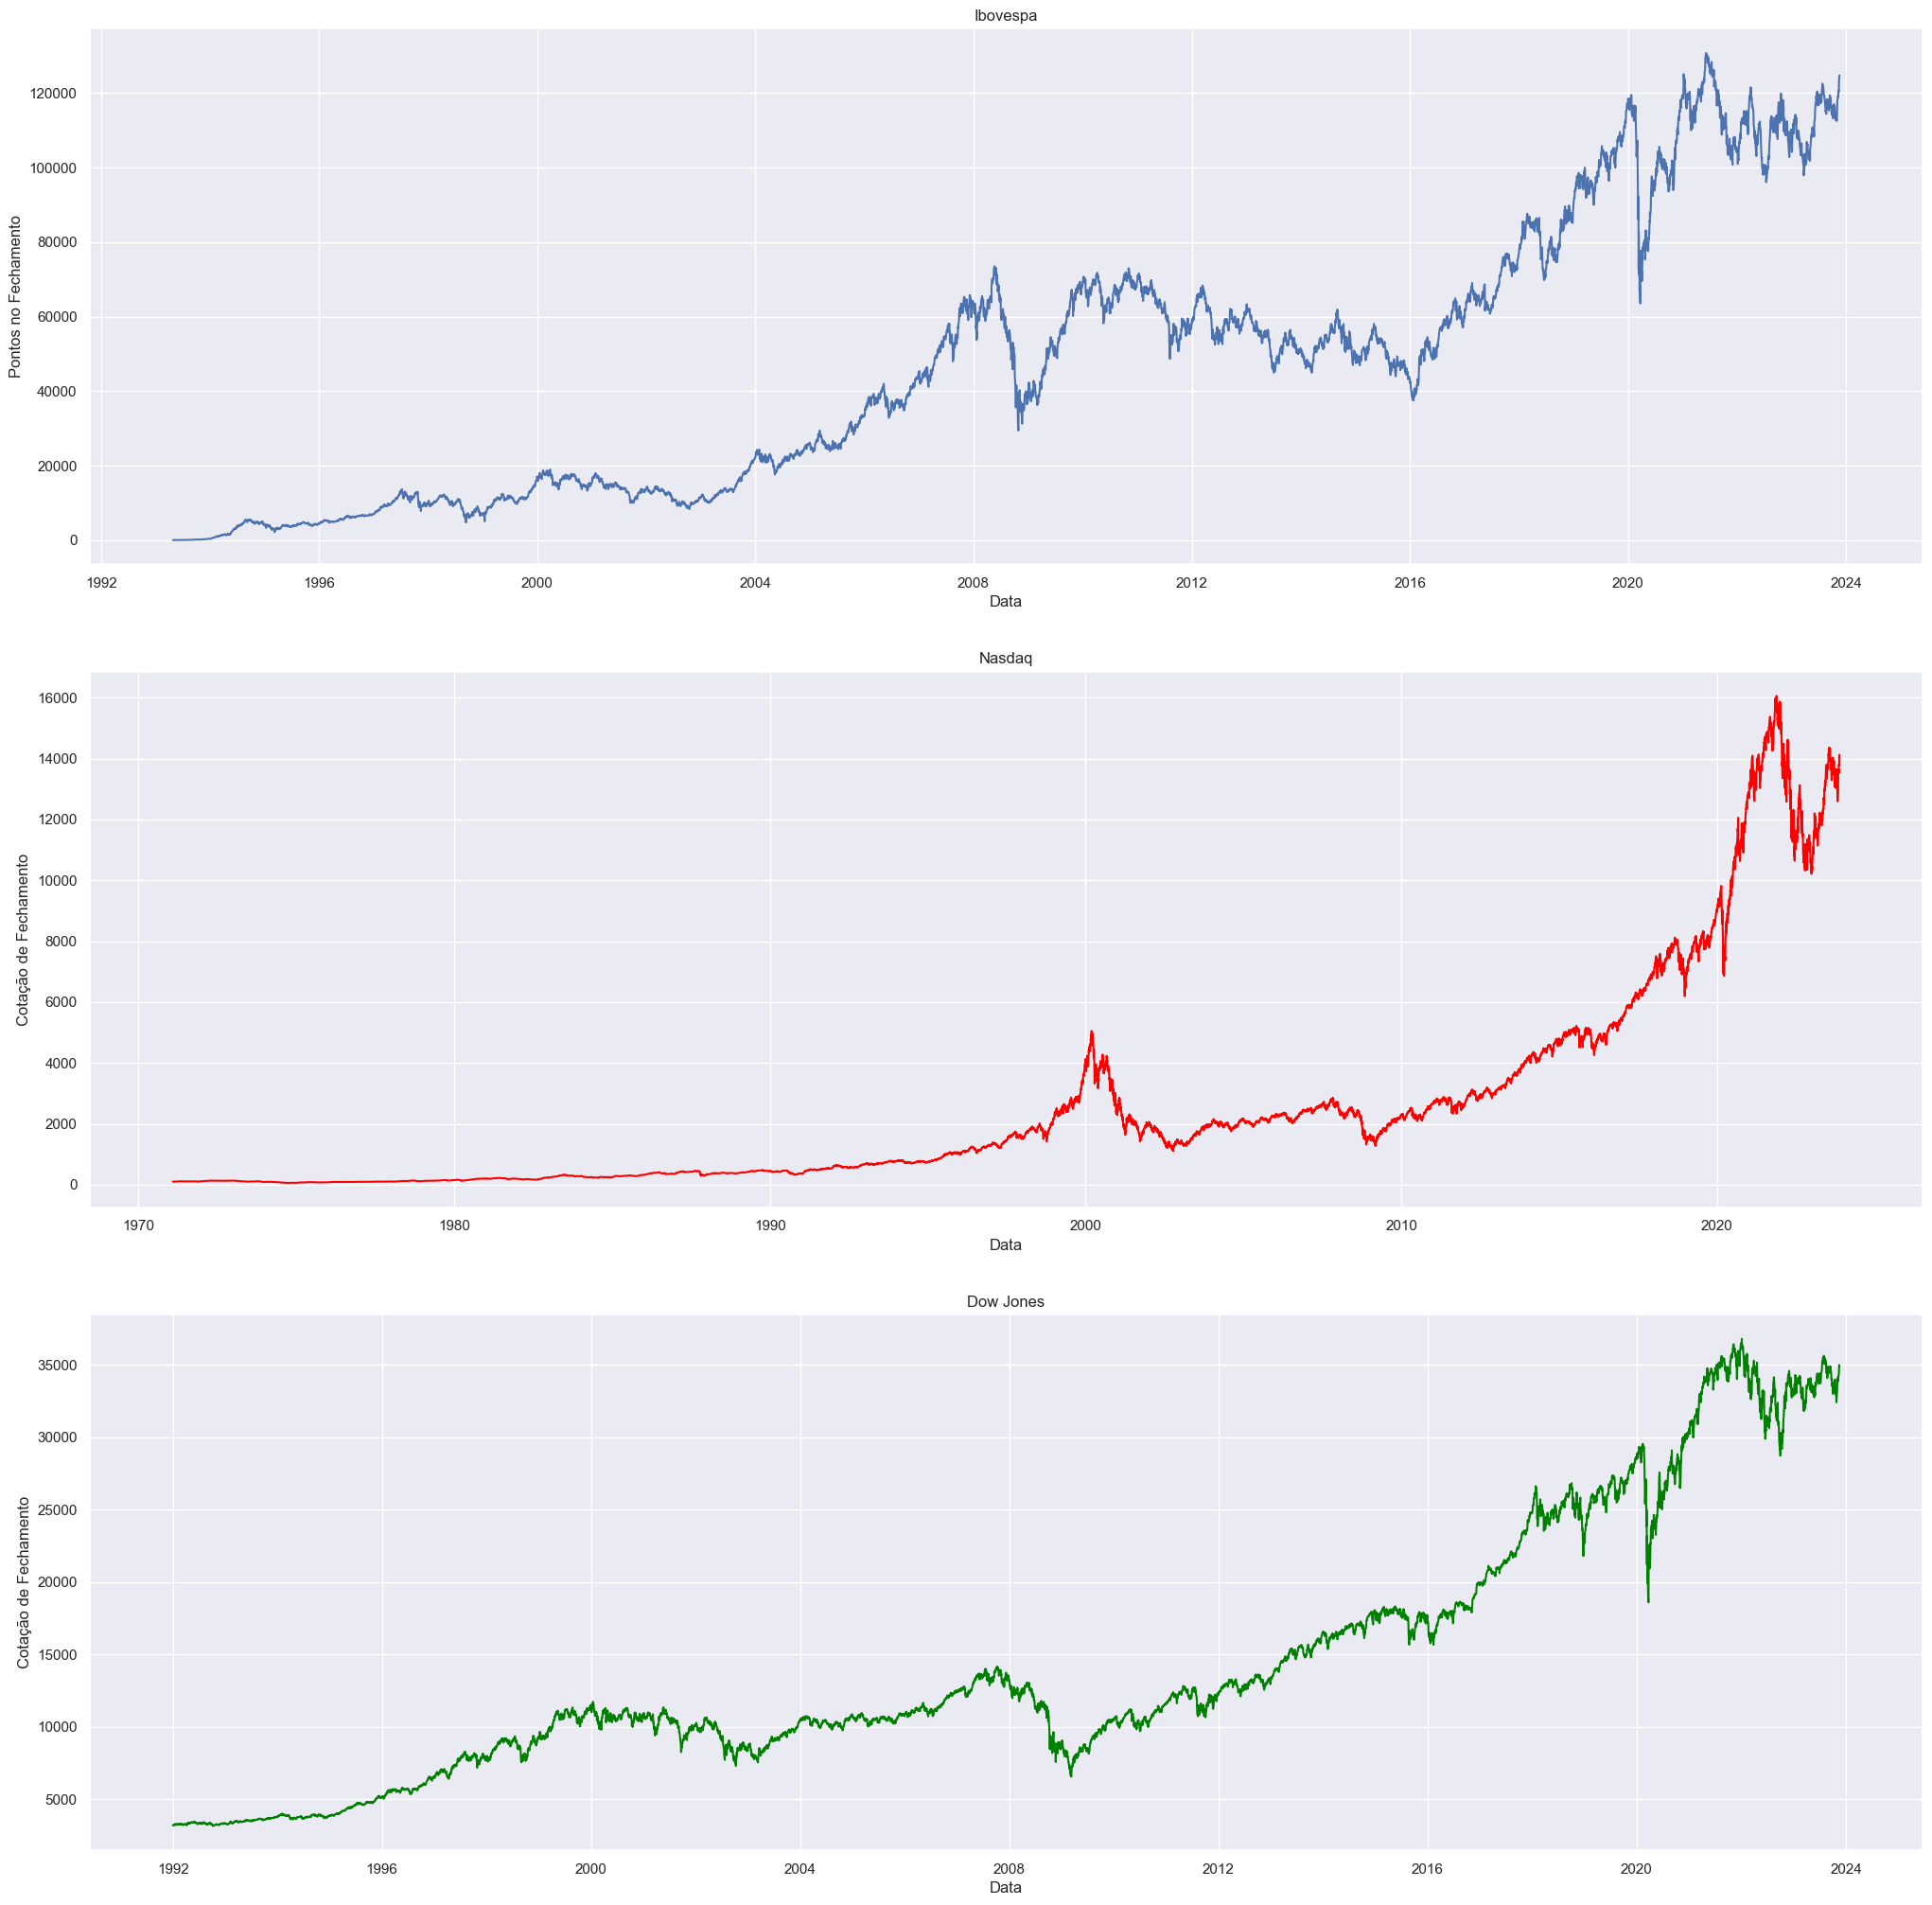

In [20]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.title('Ibovespa')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(3, 1, 2)
plt.title('Nasdaq')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(nasdaq_hist['Close'], color='red')

plt.subplot(3, 1, 3)
plt.title('Dow Jones')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dow_jones_hist['Close'], color='green')

In [21]:
import pandas as pd

nasdaq_hist = nasdaq.history(period='max')
dow_jones_hist = dow_jones.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
nasdaq_hist.index = nasdaq_hist.index.strftime('%Y-%m-%d')
nasdaq_hist = nasdaq_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dow_jones_hist.index = dow_jones_hist.index.strftime('%Y-%m-%d')
dow_jones_hist = dow_jones_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_temp = pd.merge(ibov_hist, nasdaq_hist, left_index=True, right_index=True)

df_mult = pd.merge(df_temp, dow_jones_hist, left_index=True, right_index=True)
df_mult.columns =['IBOV', 'NASDAQ', 'DOW_JONES']

df_mult

,IBOV,NASDAQ,DOW_JONES
Date,,,
1993-04-27,24.500000,652.520020,3415.929932
1993-04-28,24.299999,658.159973,3413.500000
1993-04-29,23.700001,658.450012,3425.120117
1993-04-30,24.100000,661.419983,3427.550049
1993-05-03,24.100000,666.710022,3446.459961
...,...,...,...
2023-11-10,120636.000000,13798.110352,34283.101562
2023-11-13,120376.000000,13767.740234,34337.871094
2023-11-14,123328.000000,14094.379883,34827.699219


<Axes: >

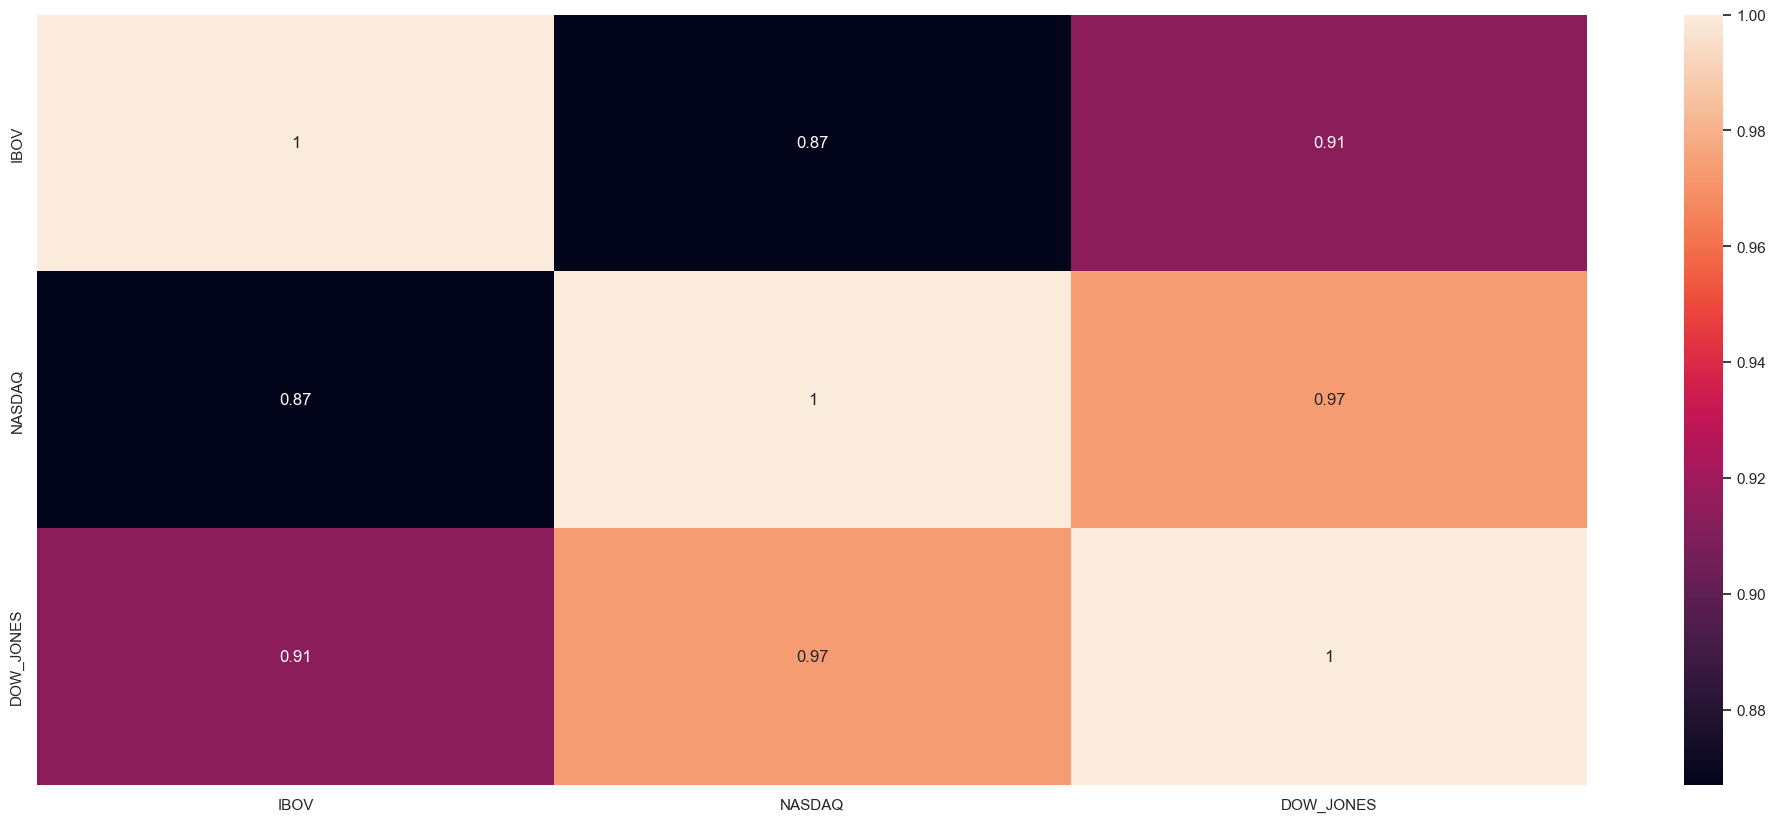

In [22]:
plt.figure(figsize=(25,10))
sns.heatmap(df_mult.corr(), annot=True)

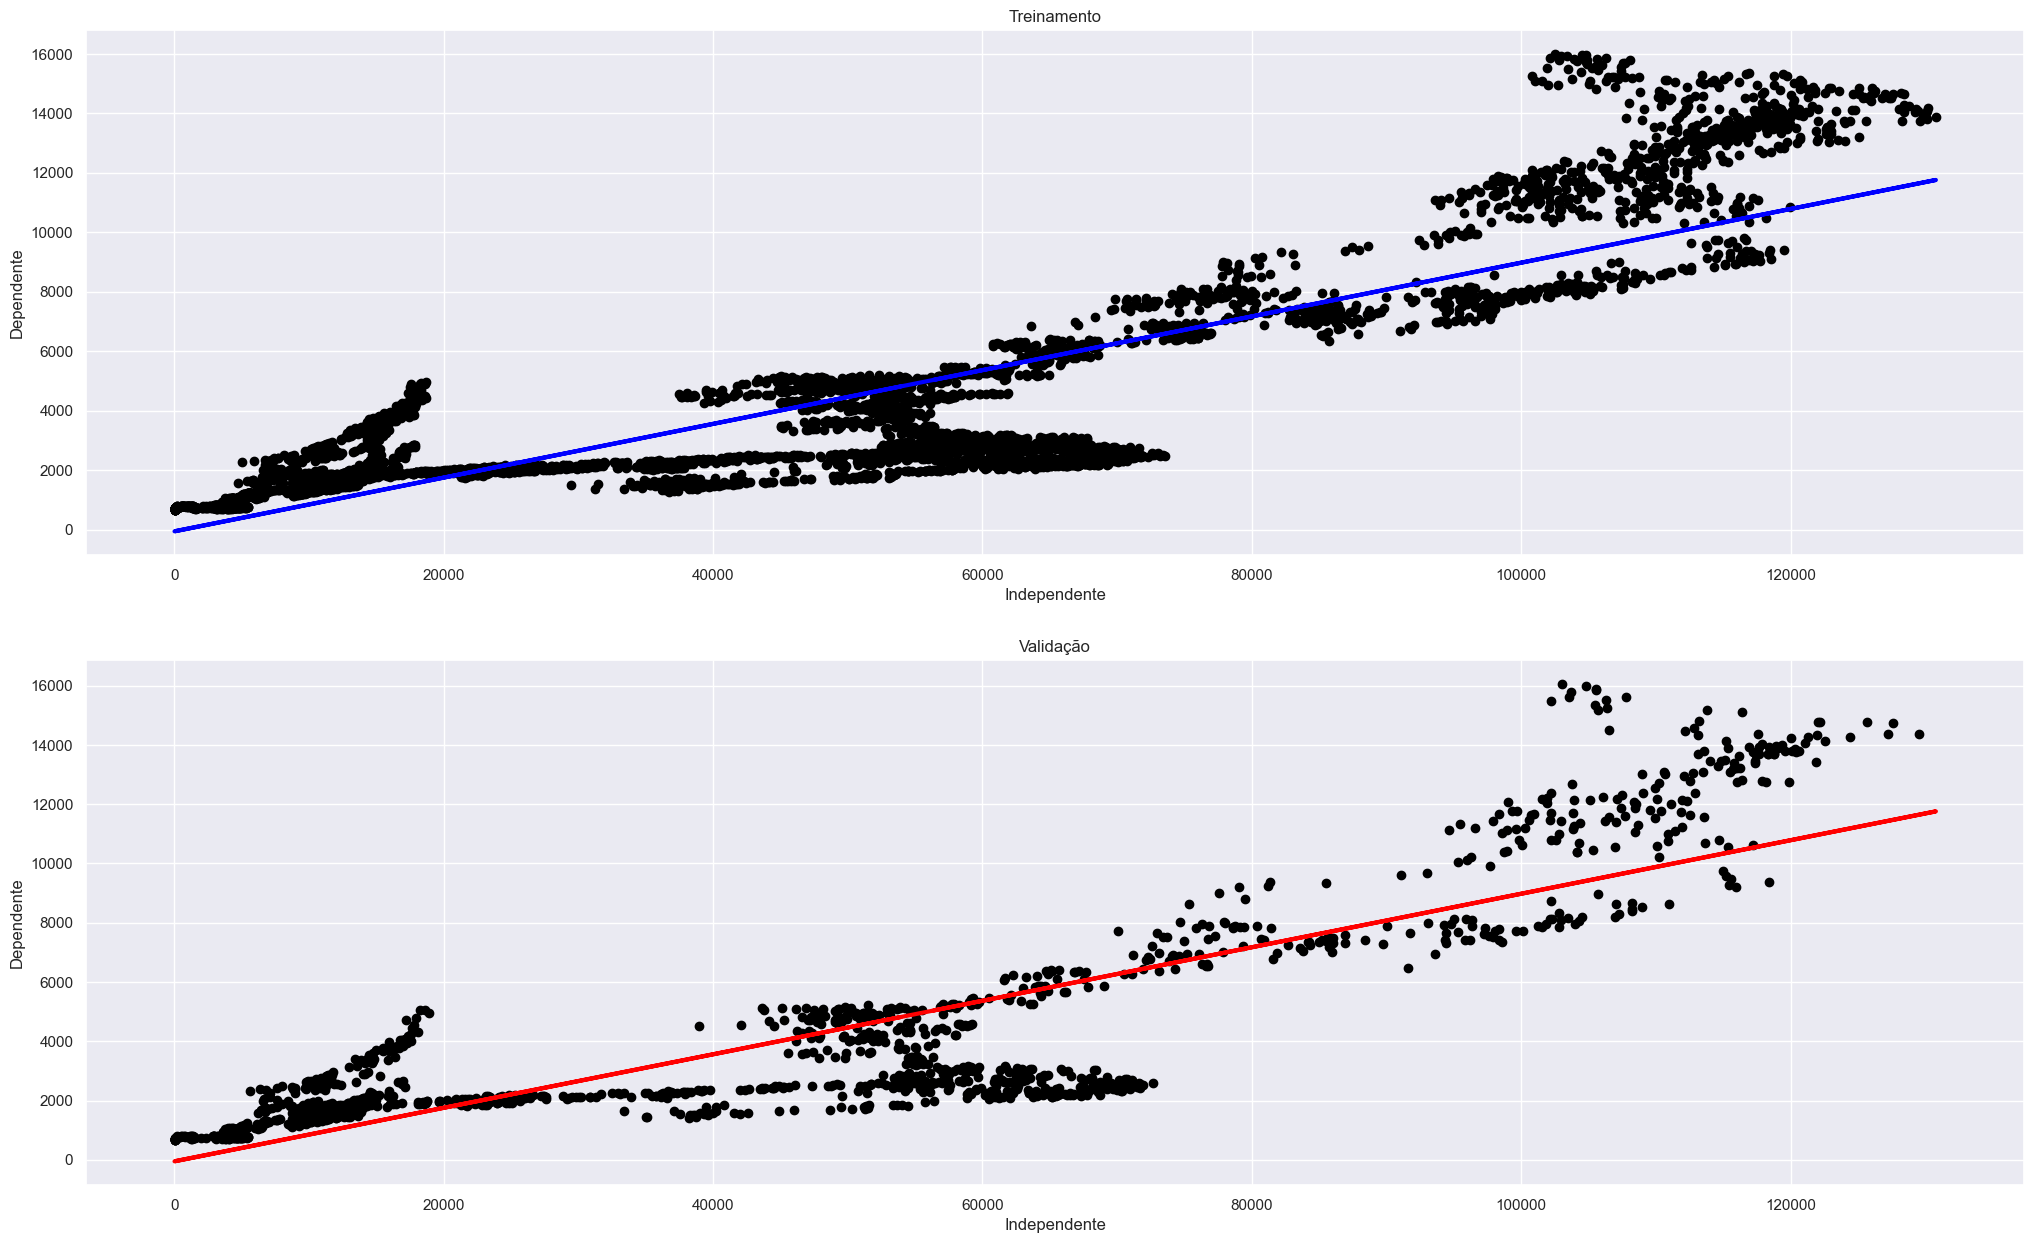

In [23]:
ret_ibov_nasdaq = reg_linear(df_mult[['IBOV']].to_numpy(), df_mult[['NASDAQ']].to_numpy())

In [24]:
print('Valores para os dados de treinamento: ', ret_ibov_nasdaq['Treinamento'])
print('Valores para os dados de validadação: ', ret_ibov_nasdaq['Validacao'])

Valores para os dados de treinamento:  {'erro médio quadrático': 3376227.035596551, 'coeficiente de determinação': 0.7517936480525493}
Valores para os dados de validadação:  {'erro médio quadrático': 3291227.58541197, 'coeficiente de determinação': 0.7515238413580475}


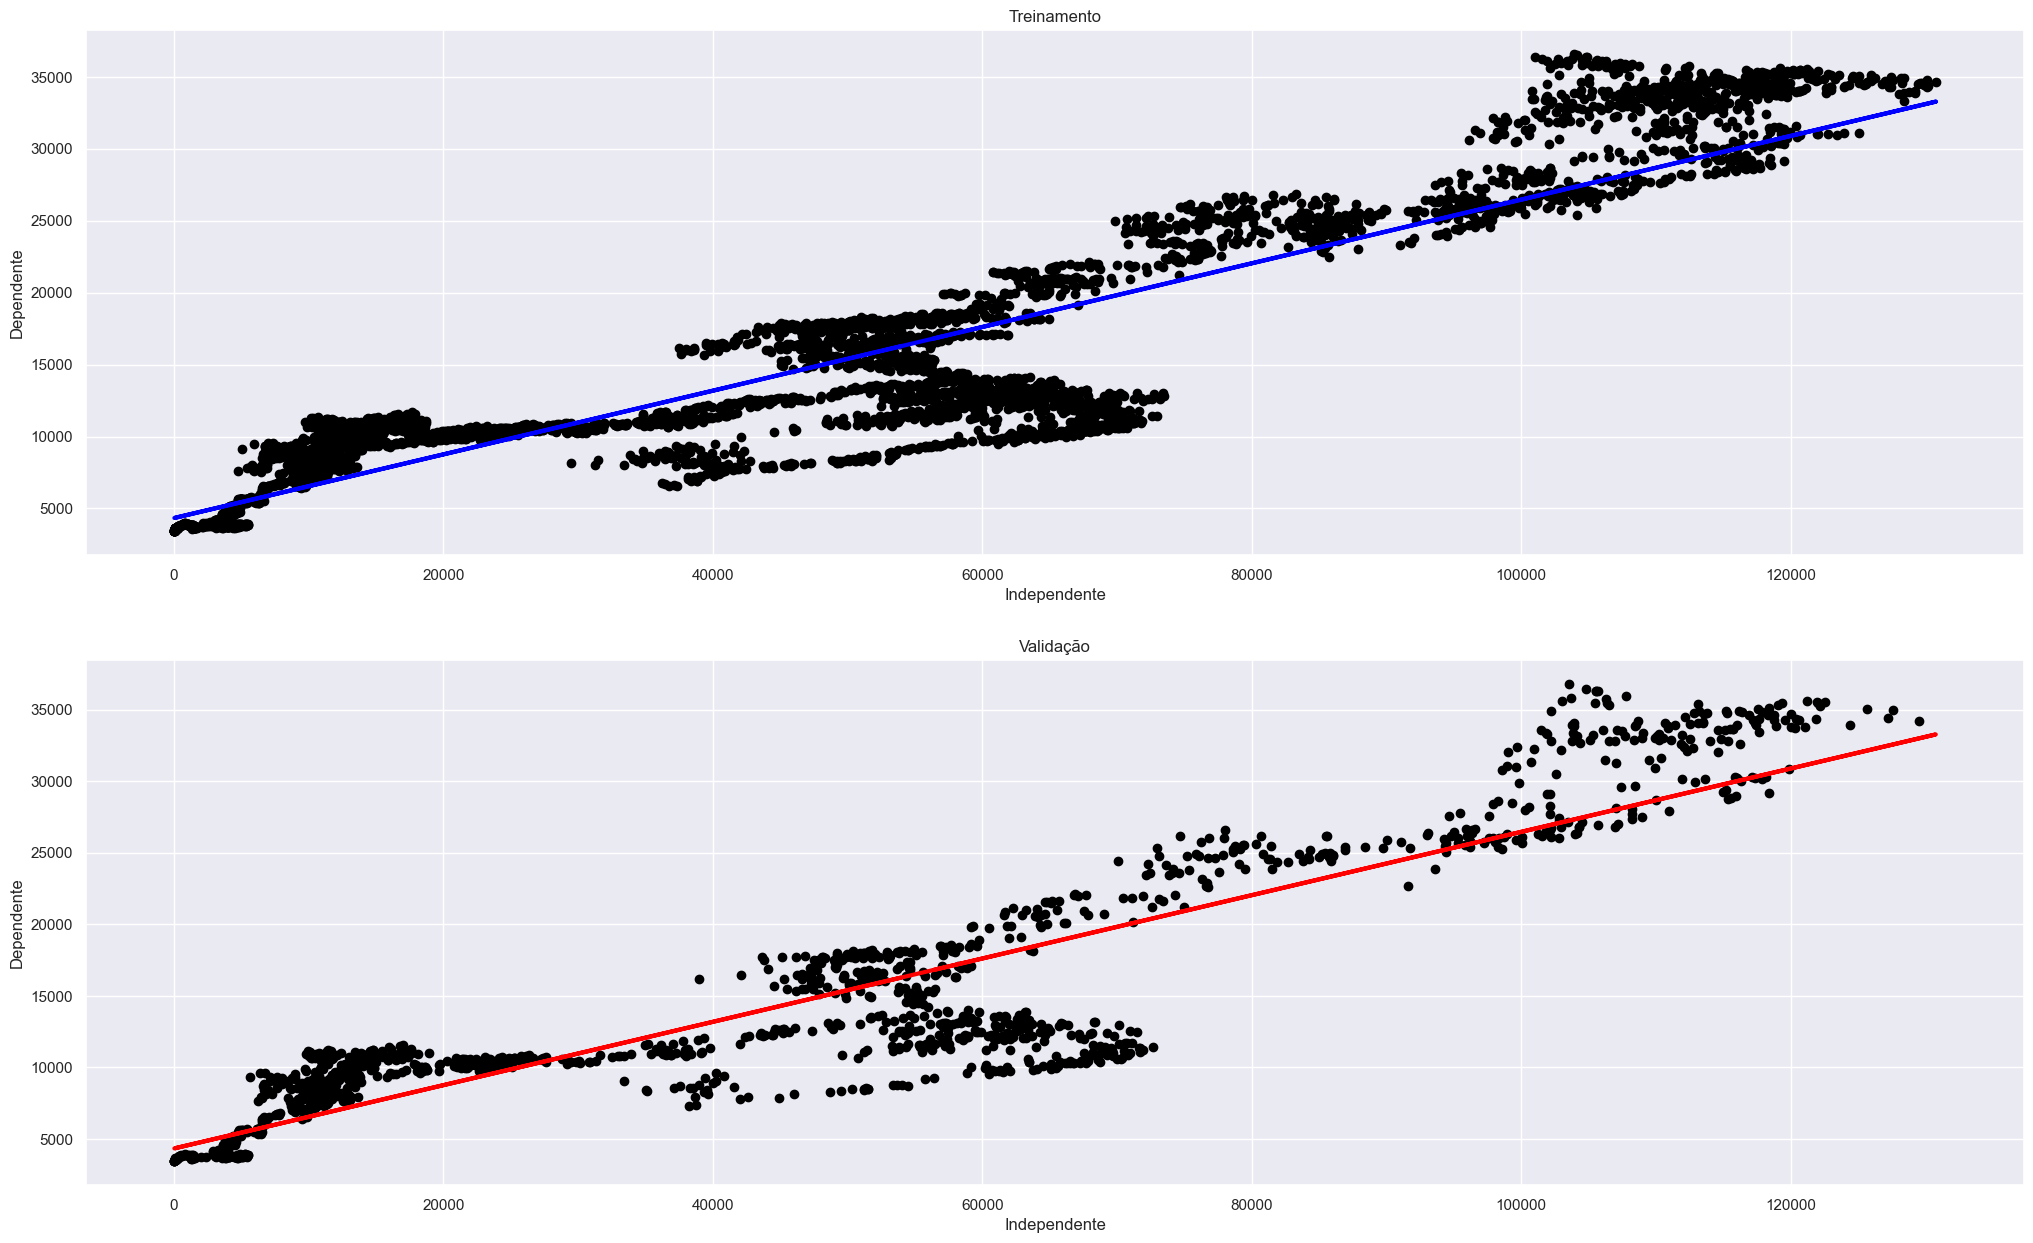

In [25]:
ret_ibov_dow_jones = reg_linear(df_mult[['IBOV']].to_numpy(), df_mult[['DOW_JONES']].to_numpy())

In [26]:
print('Valores para os dados de treinamento: ', ret_ibov_dow_jones['Treinamento'])
print('Valores para os dados de validadação: ', ret_ibov_dow_jones['Validacao'])

Valores para os dados de treinamento:  {'erro médio quadrático': 12016784.83478926, 'coeficiente de determinação': 0.8362490999722747}
Valores para os dados de validadação:  {'erro médio quadrático': 12209245.819833482, 'coeficiente de determinação': 0.8316714748667824}


### Discussão

Como foi visto pelo mapa de calor, existe uma forte relação entre os indices. Foi visto também que o erro médio quadratico é grande, devido a grande variação dos indices (uma forma de melhorar seria colocar a variação dentro de uma faixa, ou melhor normatizando). Os coficientes, tanto no treinamento quanto na validação deram resultados proximos a 1 o que é um bom indicativo.

## Regressão Logística <a class="anchor" id="3"></a>

Seguindo a tematica, iremos agora avaliar se, atraves da tecnica de regressão logistica, é possivel prever a queda ou subida de uma ação no mercado. Para isso iremos iniciar escolhendo uma ação, tendo em mente que a bolsa brasileira possui varios ativos, decidiu-se pela Copel.

A Copel (Companhia Paranaense de Energia) é uma companhia de energia de capital aberto responsável pela geração, transmissão e distribuição de energia elétrica em todo o território do estado do Paraná.

Será testado dois periodos, um levando em conta toda a serie historia, e outro pegando um curto periodo.

### Toda a Serie Histórica

In [27]:
copel = yf.Ticker('CPLE6.SA')
copel_hist = copel.history(start='2006-01-01')
# copel_hist = copel.history(start='2019-07-01', end='2020-01-01')

copel_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-01-02 00:00:00-02:00,0.687498,0.687498,0.637866,0.687498,7230000,0.0,0.0
2006-01-03 00:00:00-02:00,0.702204,0.705880,0.687130,0.702204,12881000,0.0,0.0
2006-01-04 00:00:00-02:00,0.709189,0.709189,0.693748,0.709189,8629000,0.0,0.0
2006-01-05 00:00:00-02:00,0.724263,0.736763,0.698527,0.724263,10525000,0.0,0.0
2006-01-06 00:00:00-02:00,0.742645,0.742645,0.727939,0.742645,6222000,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-10 00:00:00-03:00,8.820000,9.020000,8.820000,8.970000,17755600,0.0,0.0
2023-11-13 00:00:00-03:00,8.970000,9.030000,8.880000,8.960000,13527000,0.0,0.0
2023-11-14 00:00:00-03:00,9.010000,9.310000,8.980000,9.260000,34753500,0.0,0.0


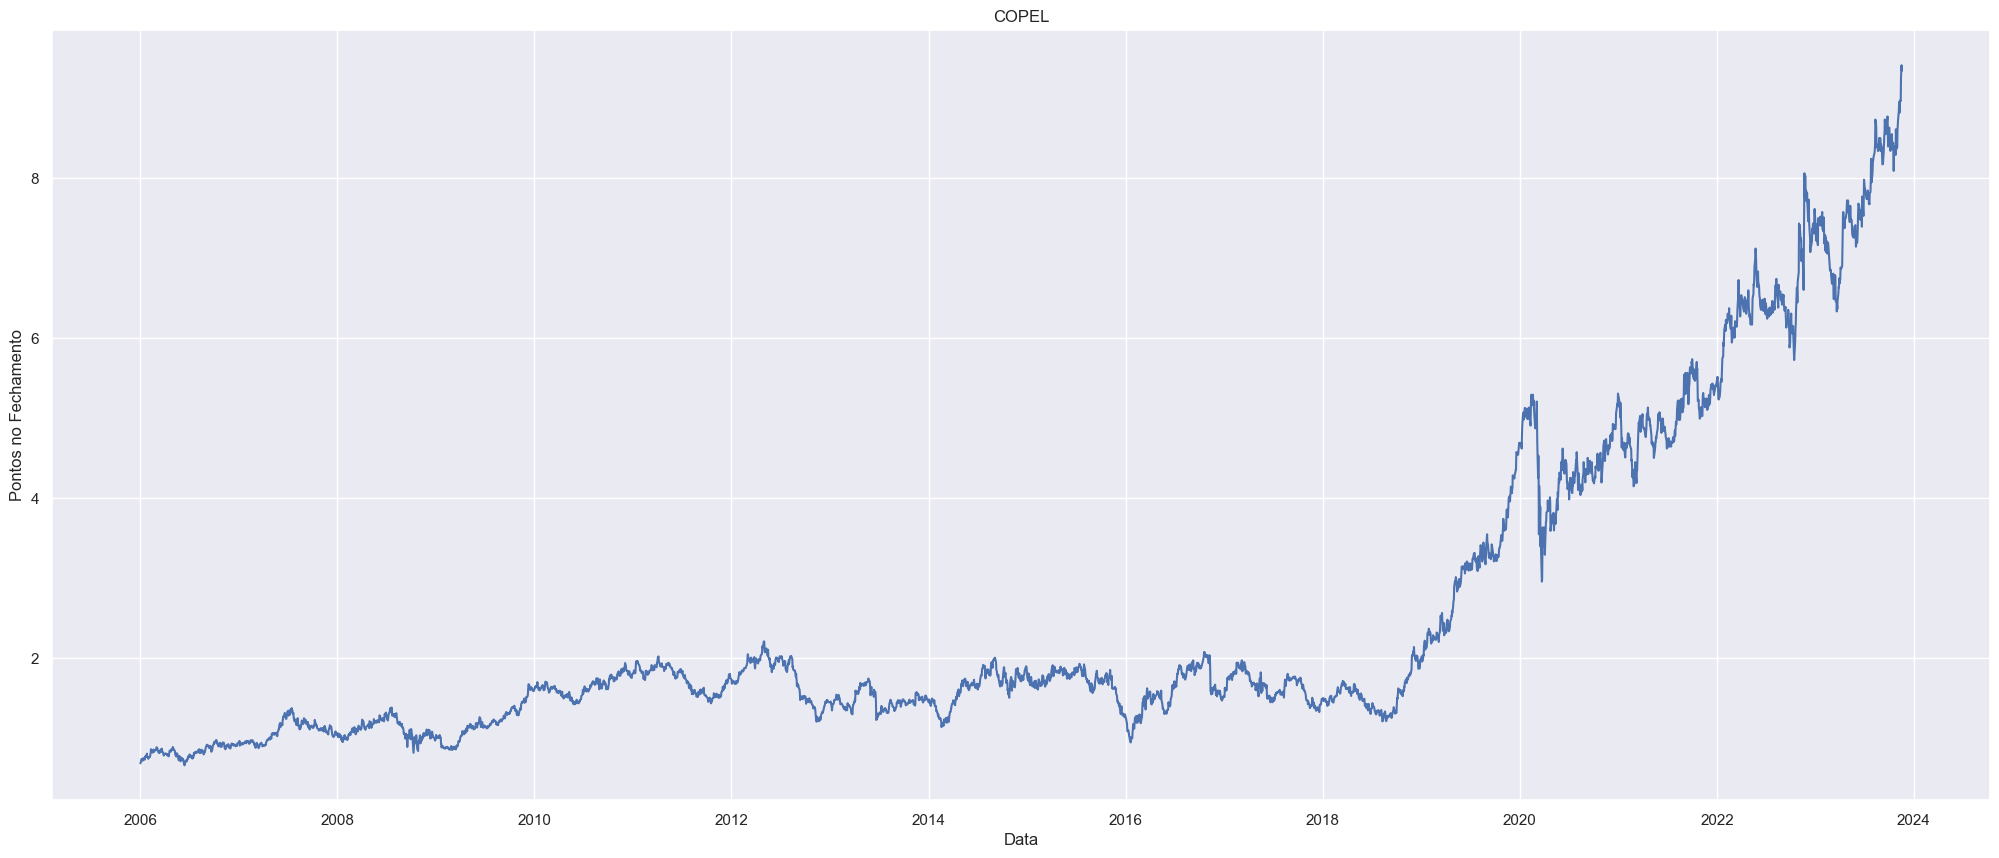

In [28]:
plt.figure(figsize=(25, 10))
plt.title('COPEL')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(copel_hist['Close'])

In [29]:
def prep_reg_log(df_input):

    df = df_input['Close'].pct_change() * 100
    df = df.rename("Today")
    df.index = df.index.strftime('%Y-%m-%d')
    df = df.reset_index()

    for i in range(1, 6):
        df['Lag '+str(i)] = df["Today"].shift(i)


    df['Volume'] = df_input.Volume.shift(1).values/1000_000

    df = df.dropna()

    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]

    return df

In [30]:
df = prep_reg_log(copel_hist)
df

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,2006-01-10,-2.487548,-0.495059,2.538064,2.125469,0.994752,2.139010,6.4960,0
7,2006-01-11,4.081631,-2.487548,-0.495059,2.538064,2.125469,0.994752,9.1530,1
8,2006-01-12,-0.490214,4.081631,-2.487548,-0.495059,2.538064,2.125469,12.0060,0
9,2006-01-13,-1.970403,-0.490214,4.081631,-2.487548,-0.495059,2.538064,9.3430,0
10,2006-01-16,2.512539,-1.970403,-0.490214,4.081631,-2.487548,-0.495059,10.9070,1
...,...,...,...,...,...,...,...,...,...
4440,2023-11-10,1.700687,-0.338991,-1.117312,1.244340,1.376145,1.395347,22.9336,1
4441,2023-11-13,-0.111485,1.700687,-0.338991,-1.117312,1.244340,1.376145,17.7556,0
4442,2023-11-14,3.348216,-0.111485,1.700687,-0.338991,-1.117312,1.244340,13.5270,1
4443,2023-11-16,1.619866,3.348216,-0.111485,1.700687,-0.338991,-1.117312,34.7535,1


array([[<Axes: title={'center': 'Today'}>,
        <Axes: title={'center': 'Lag 1'}>,
        <Axes: title={'center': 'Lag 2'}>],
       [<Axes: title={'center': 'Lag 3'}>,
        <Axes: title={'center': 'Lag 4'}>,
        <Axes: title={'center': 'Lag 5'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Direction'}>, <Axes: >]], dtype=object)

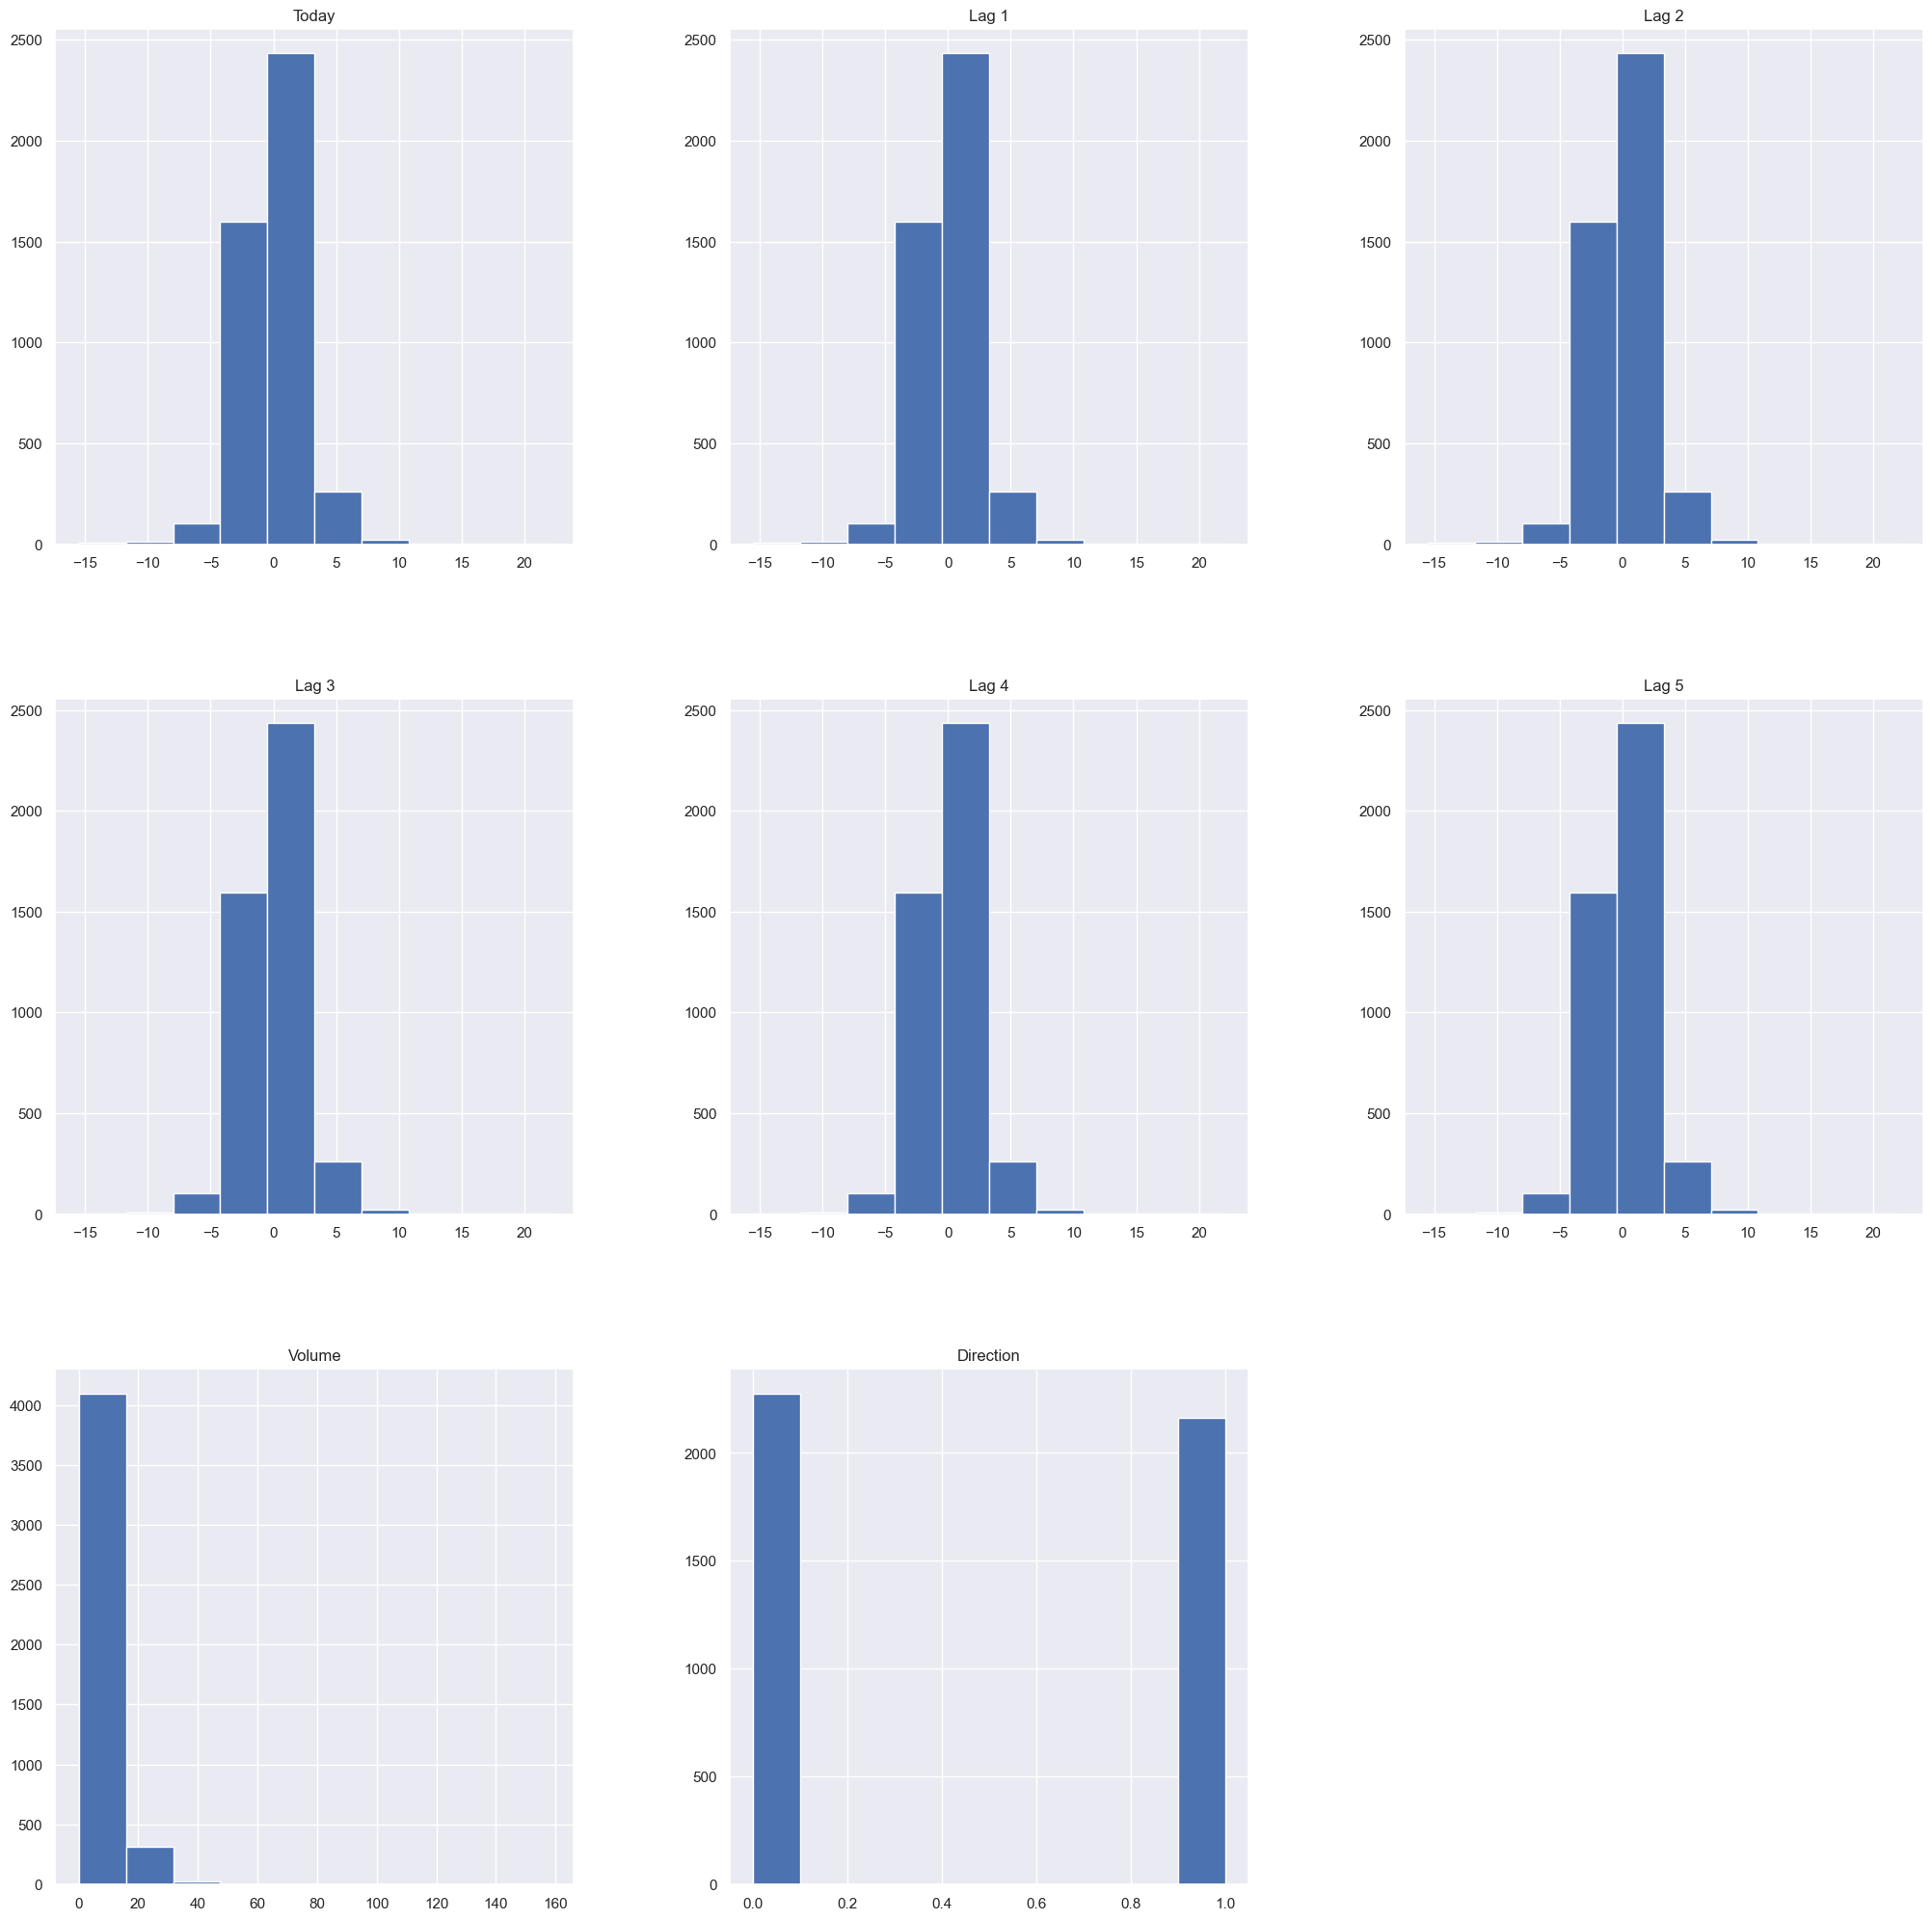

In [31]:
df.hist(figsize=(25,25))

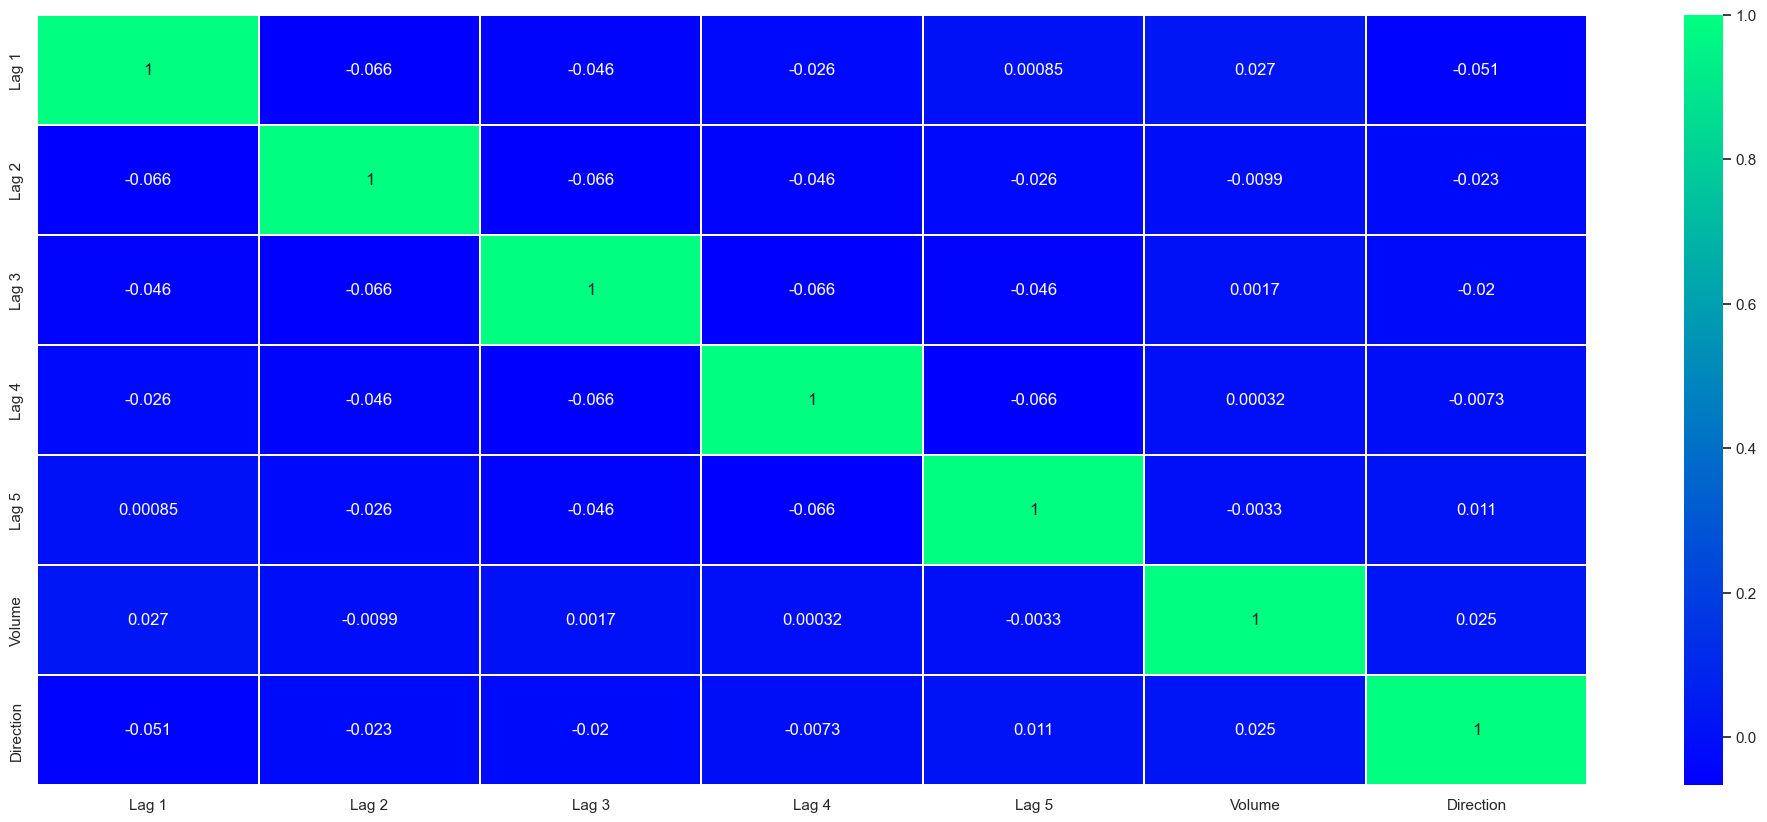

In [32]:
# Correlation matrix
matrix_corr = df[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume', 'Direction']]
plt.figure(figsize=(25,10))
sns.heatmap(matrix_corr.corr(),linewidth=0.01,annot=True,cmap="winter")
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def func_reg_log(indep, dep):
    X_std = StandardScaler().fit_transform(indep)
    X_train,X_test,y_train,y_test=train_test_split(X_std,dep,test_size=0.25,random_state=40)
    lr=LogisticRegression(C=1.0,class_weight='balanced',dual=False,
    fit_intercept=True, intercept_scaling=1,max_iter=100,multi_class='auto',
    n_jobs=None,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001,
    verbose=0,warm_start=False)

    model1=lr.fit(X_train,y_train)

    prediction = model1.predict(X_train)
    cm= confusion_matrix(y_train,prediction)

    prediction_test = model1.predict(X_test)
    cm_test=confusion_matrix(y_test,prediction_test)

    class_report = classification_report(y_test, prediction_test)
    
    logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

    return cm, cm_test, class_report, logit_roc_auc, fpr, tpr

In [34]:
def matrix_TP_TN_FN_FP_reg_log(cm):

    plt.figure(figsize=(25,10))
    sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
    linecolor='black',annot_kws={"size":20})

    TP=cm[0][0]
    print('Verdadeiro Positivo:',TP)
    TN=cm[1][1]
    print('Verdadeiro Negativo:',TN)
    FN=cm[1][0]
    print('Falso Negativo:',FN)
    FP=cm[0][1]
    print('Falso Positivo:',FP)

    print('Teste de Acuracia (TP+TN)/(TP+TN+FN+FP):',(TP+TN)/(TP+TN+FN+FP))

In [35]:
def curve_roc(logit_roc_auc, fpr, tpr):
    plt.figure(figsize=(25,10))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [36]:
indep = df[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
dep = df.Direction

cm, cm_test, class_report, logit_roc_auc, fpr, tpr = func_reg_log(indep, dep)


A matriz de confusão para os dados de treinamento foi a seguinte:

Verdadeiro Positivo: 914
Verdadeiro Negativo: 825
Falso Negativo: 805
Falso Positivo: 785
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.5223790928206669


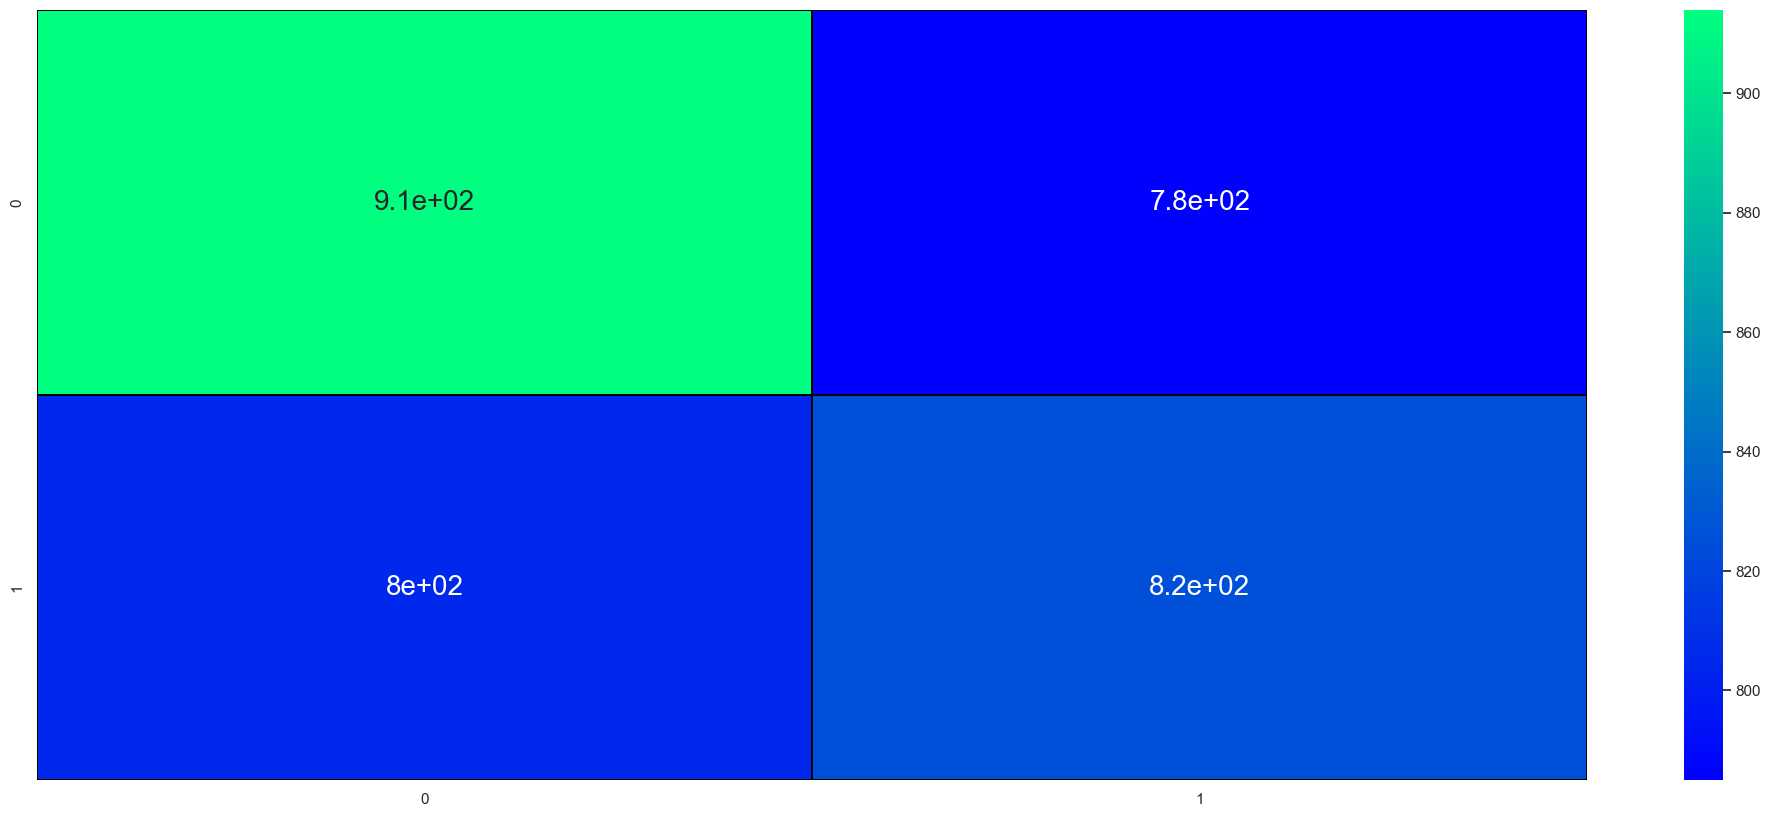

In [37]:
matrix_TP_TN_FN_FP_reg_log(cm)

A matriz de confusão para os dados de teste foi a seguinte:

Verdadeiro Positivo: 316
Verdadeiro Negativo: 274
Falso Negativo: 258
Falso Positivo: 262
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.5315315315315315


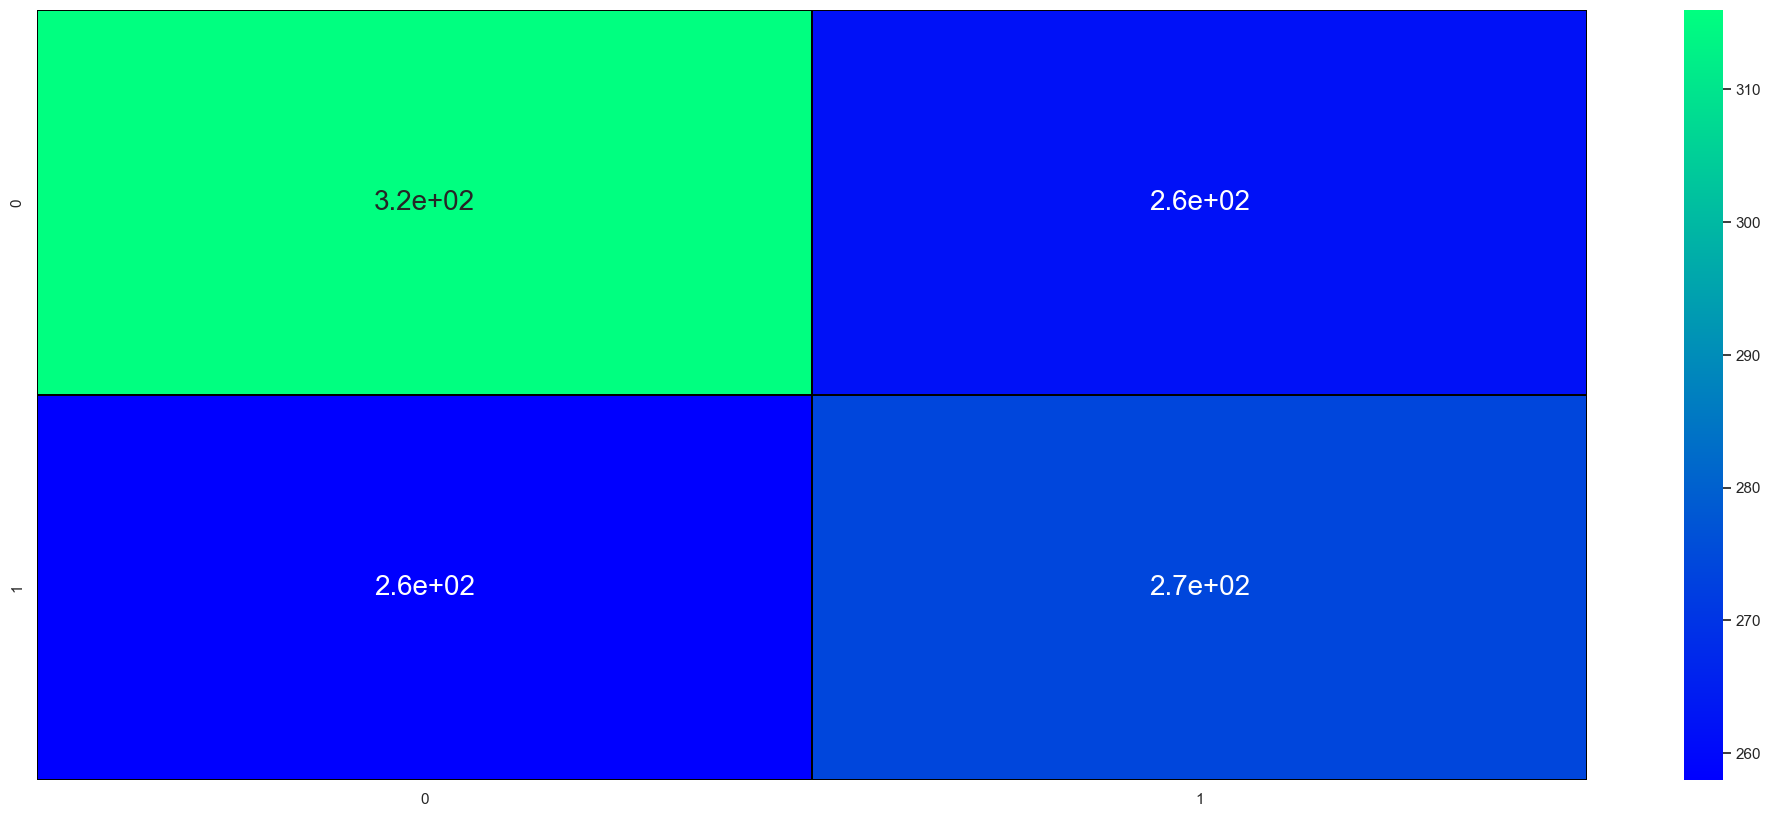

In [38]:
matrix_TP_TN_FN_FP_reg_log(cm_test)

E temos a seguinte matriz de reporte da classe:

In [39]:
print(class_report)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       578
           1       0.51      0.52      0.51       532

    accuracy                           0.53      1110
   macro avg       0.53      0.53      0.53      1110
weighted avg       0.53      0.53      0.53      1110



A curva ROC é a seguinte:

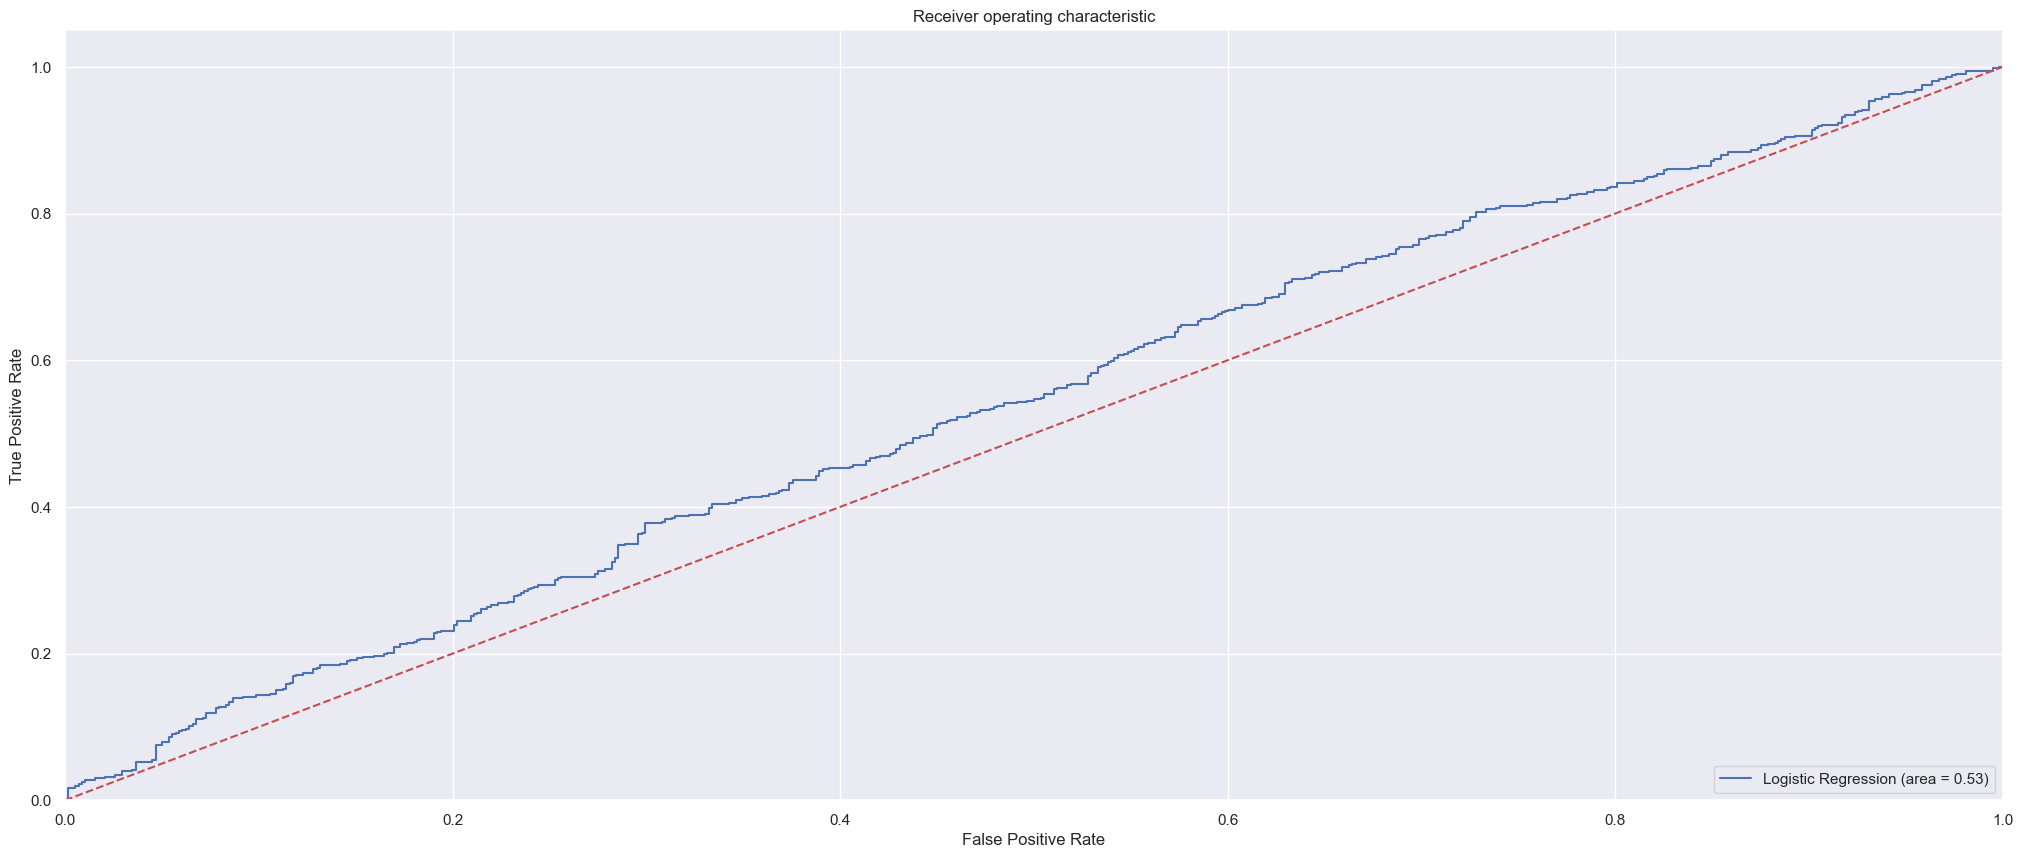

In [40]:
curve_roc(logit_roc_auc, fpr, tpr)

### Recorte de um periodo

In [41]:
copel_hist = copel.history(start='2022-06-01', end='2023-01-01')

copel_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-01 00:00:00-03:00,6.796735,6.805957,6.695291,6.759846,10480800,0.0,0.0
2022-06-02 00:00:00-03:00,6.815179,6.888956,6.732180,6.833623,6155900,0.0,0.0
2022-06-03 00:00:00-03:00,6.852068,6.870512,6.704514,6.704514,7623200,0.0,0.0
2022-06-06 00:00:00-03:00,6.722958,6.750624,6.603069,6.649180,5344300,0.0,0.0
2022-06-07 00:00:00-03:00,6.658403,6.676847,6.510848,6.547737,8132300,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,7.441482,7.528123,7.374095,7.431855,5997200,0.0,0.0
2022-12-26 00:00:00-03:00,7.412602,7.470363,7.239321,7.374095,4288700,0.0,0.0
2022-12-27 00:00:00-03:00,7.402975,7.402975,7.191186,7.306708,9879800,0.0,0.0


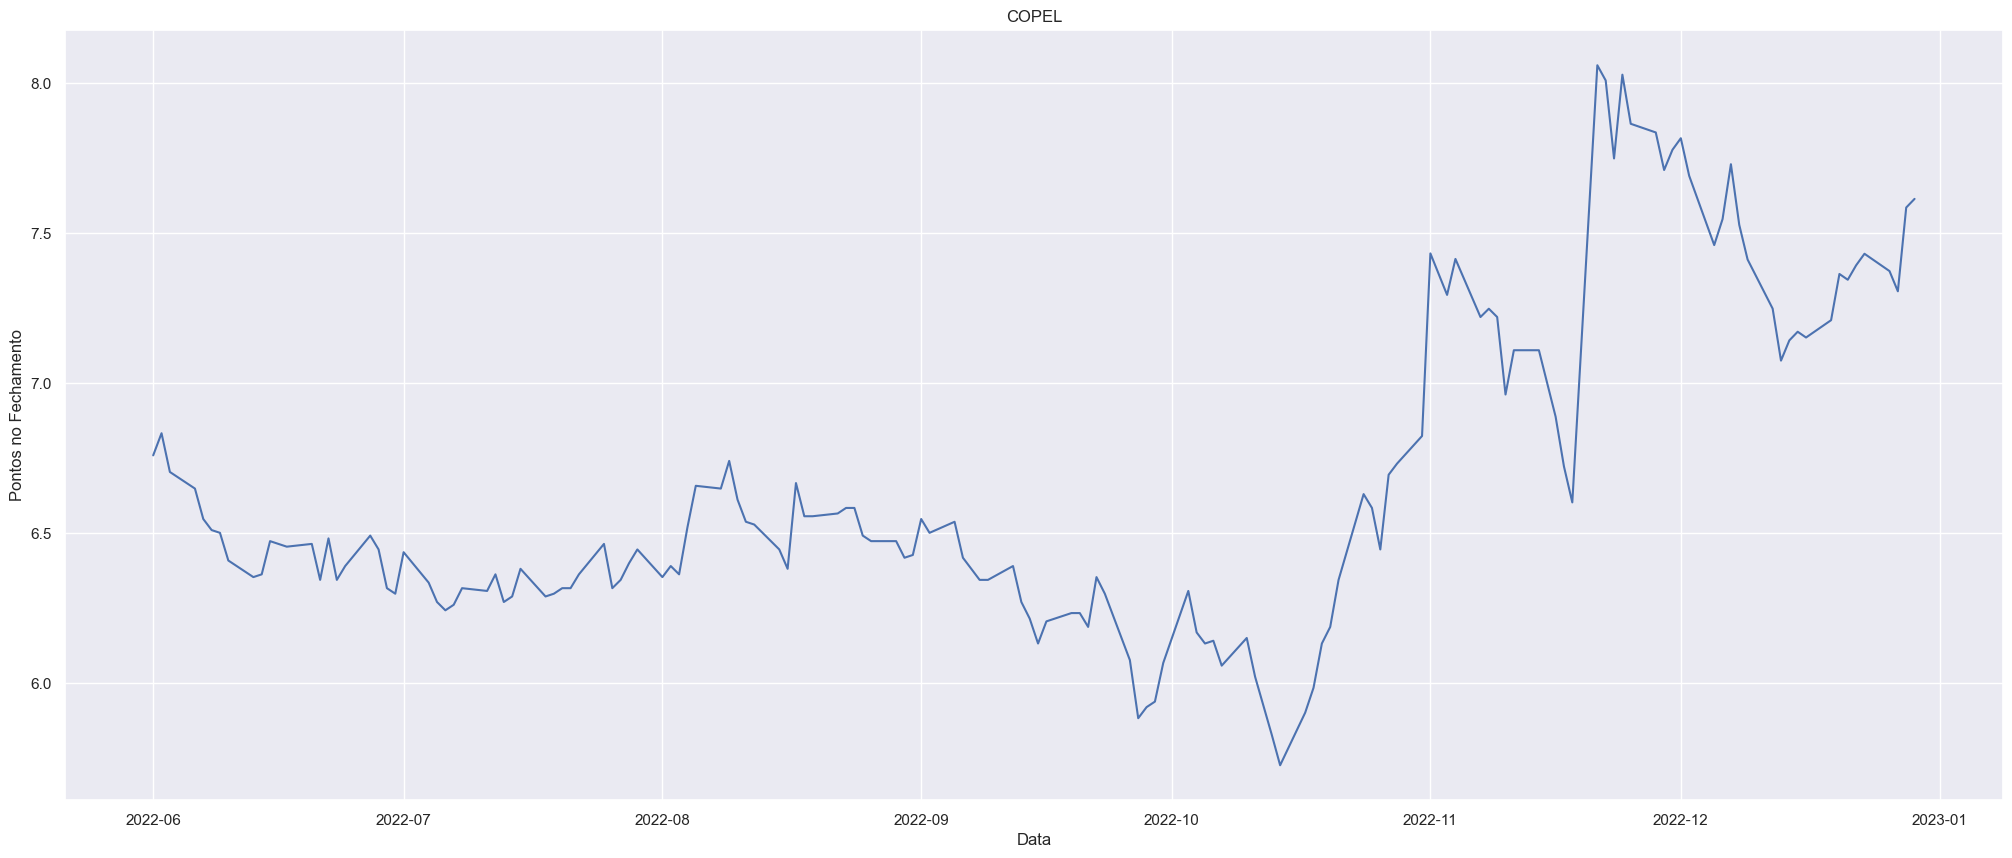

In [42]:
plt.figure(figsize=(25, 10))
plt.title('COPEL')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(copel_hist['Close'])

In [43]:
df = prep_reg_log(copel_hist)
df

,Date,Today,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
6,2022-06-09,-0.141648,-0.563379,-1.525658,-0.825312,-1.889332,1.091404,7.0439,0
7,2022-06-10,-1.418441,-0.141648,-0.563379,-1.525658,-0.825312,-1.889332,9.3537,0
8,2022-06-13,-0.863312,-1.418441,-0.141648,-0.563379,-1.525658,-0.825312,10.4478,0
9,2022-06-14,0.145143,-0.863312,-1.418441,-0.141648,-0.563379,-1.525658,13.5816,1
10,2022-06-15,1.739135,0.145143,-0.863312,-1.418441,-0.141648,-0.563379,9.1281,1
...,...,...,...,...,...,...,...,...,...
142,2022-12-23,0.520833,0.655302,-0.261434,2.136186,0.807533,-0.268453,8.0737,1
143,2022-12-26,-0.777198,0.520833,0.655302,-0.261434,2.136186,0.807533,5.9972,0
144,2022-12-27,-0.913836,-0.777198,0.520833,0.655302,-0.261434,2.136186,4.2887,0
145,2022-12-28,3.820815,-0.913836,-0.777198,0.520833,0.655302,-0.261434,9.8798,1


array([[<Axes: title={'center': 'Today'}>,
        <Axes: title={'center': 'Lag 1'}>,
        <Axes: title={'center': 'Lag 2'}>],
       [<Axes: title={'center': 'Lag 3'}>,
        <Axes: title={'center': 'Lag 4'}>,
        <Axes: title={'center': 'Lag 5'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Direction'}>, <Axes: >]], dtype=object)

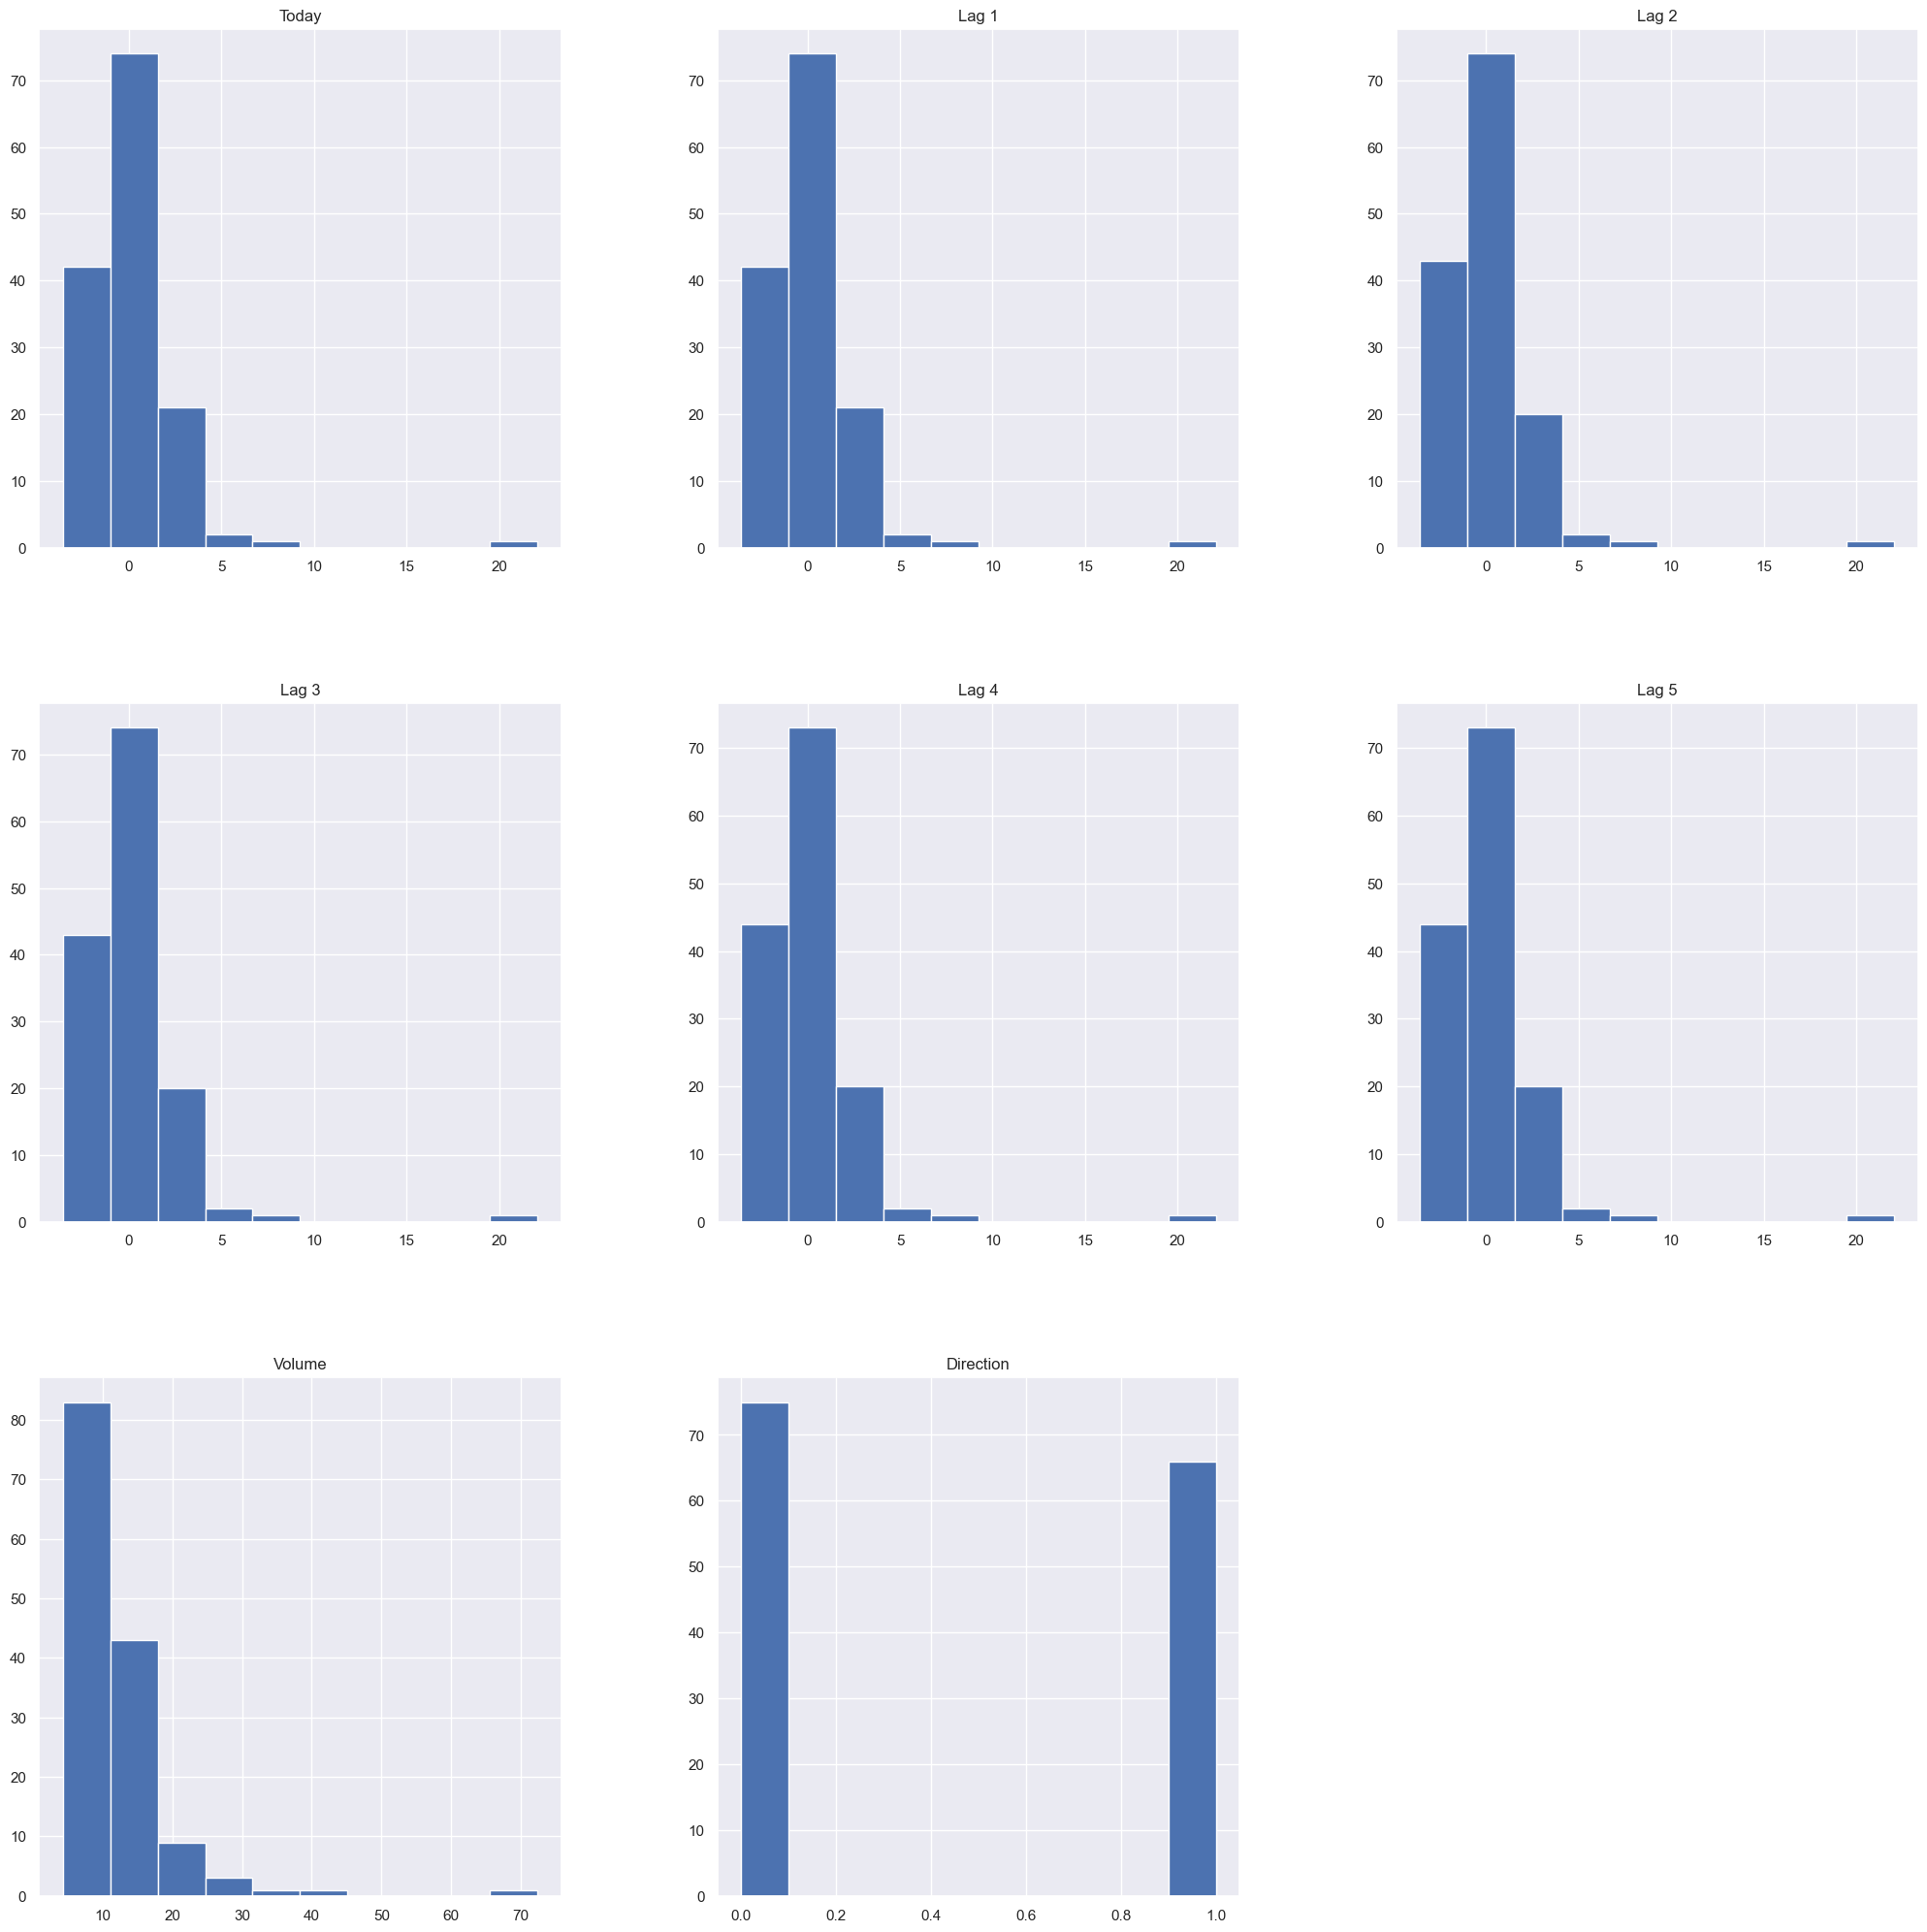

In [44]:
df.hist(figsize=(25,25))

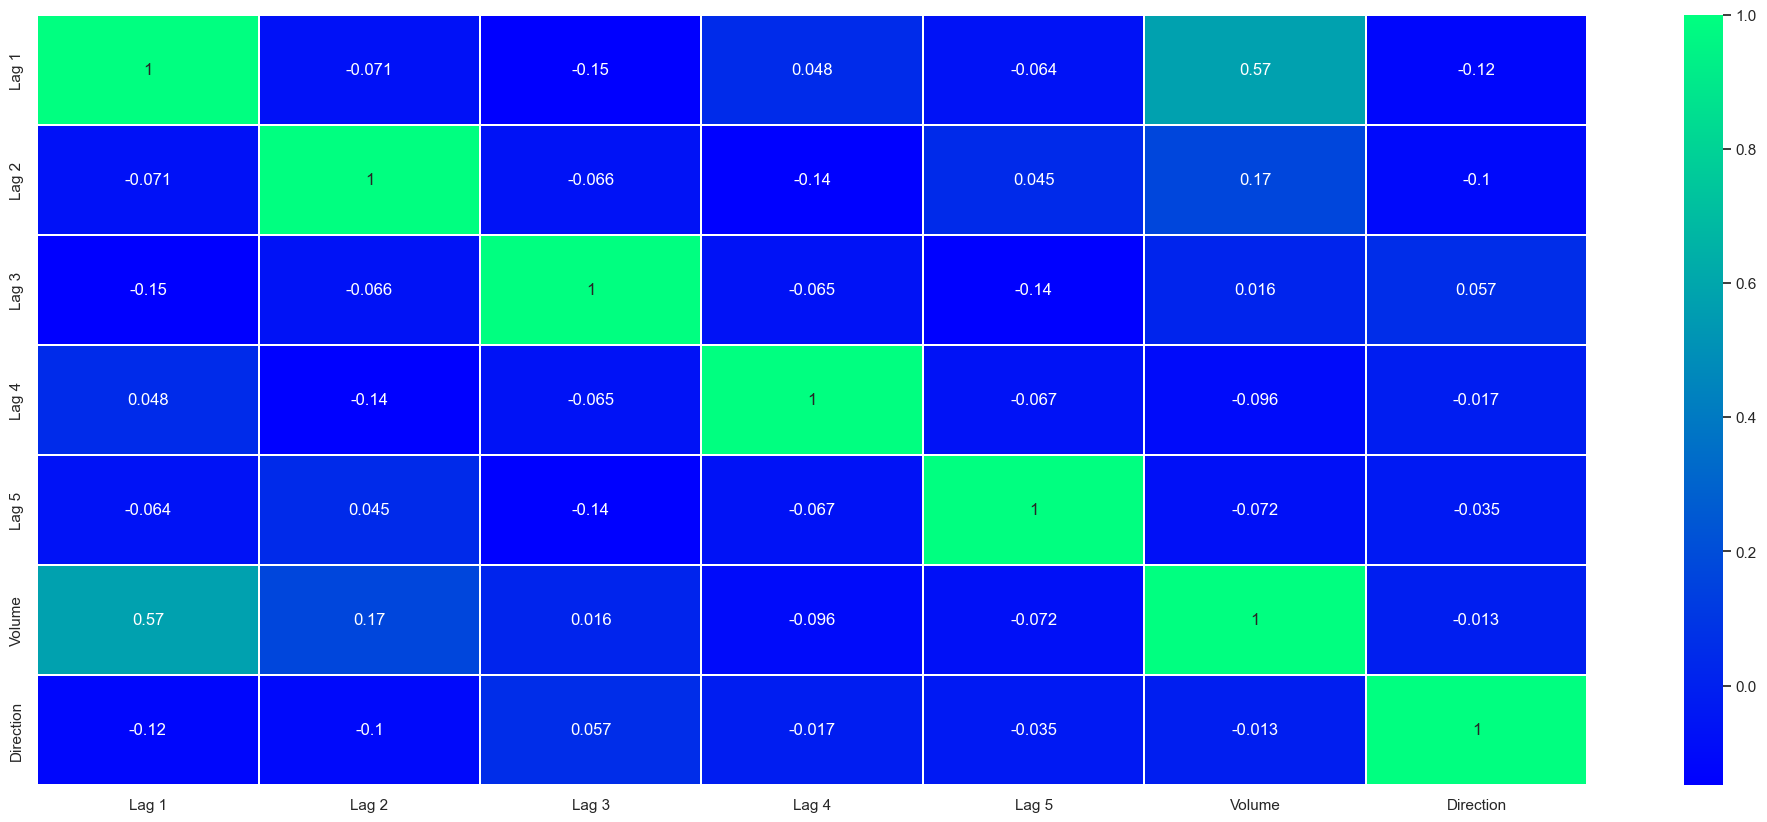

In [45]:
# Correlation matrix
matrix_corr = df[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume', 'Direction']]
plt.figure(figsize=(25,10))
sns.heatmap(matrix_corr.corr(),linewidth=0.01,annot=True,cmap="winter")
plt.show()

In [46]:
indep = df[['Lag 1', 'Lag 2', 'Lag 3', 'Volume']]
dep = df.Direction

cm, cm_test, class_report, logit_roc_auc, fpr, tpr = func_reg_log(indep, dep)

Verdadeiro Positivo: 34
Verdadeiro Negativo: 28
Falso Negativo: 23
Falso Positivo: 20
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.5904761904761905


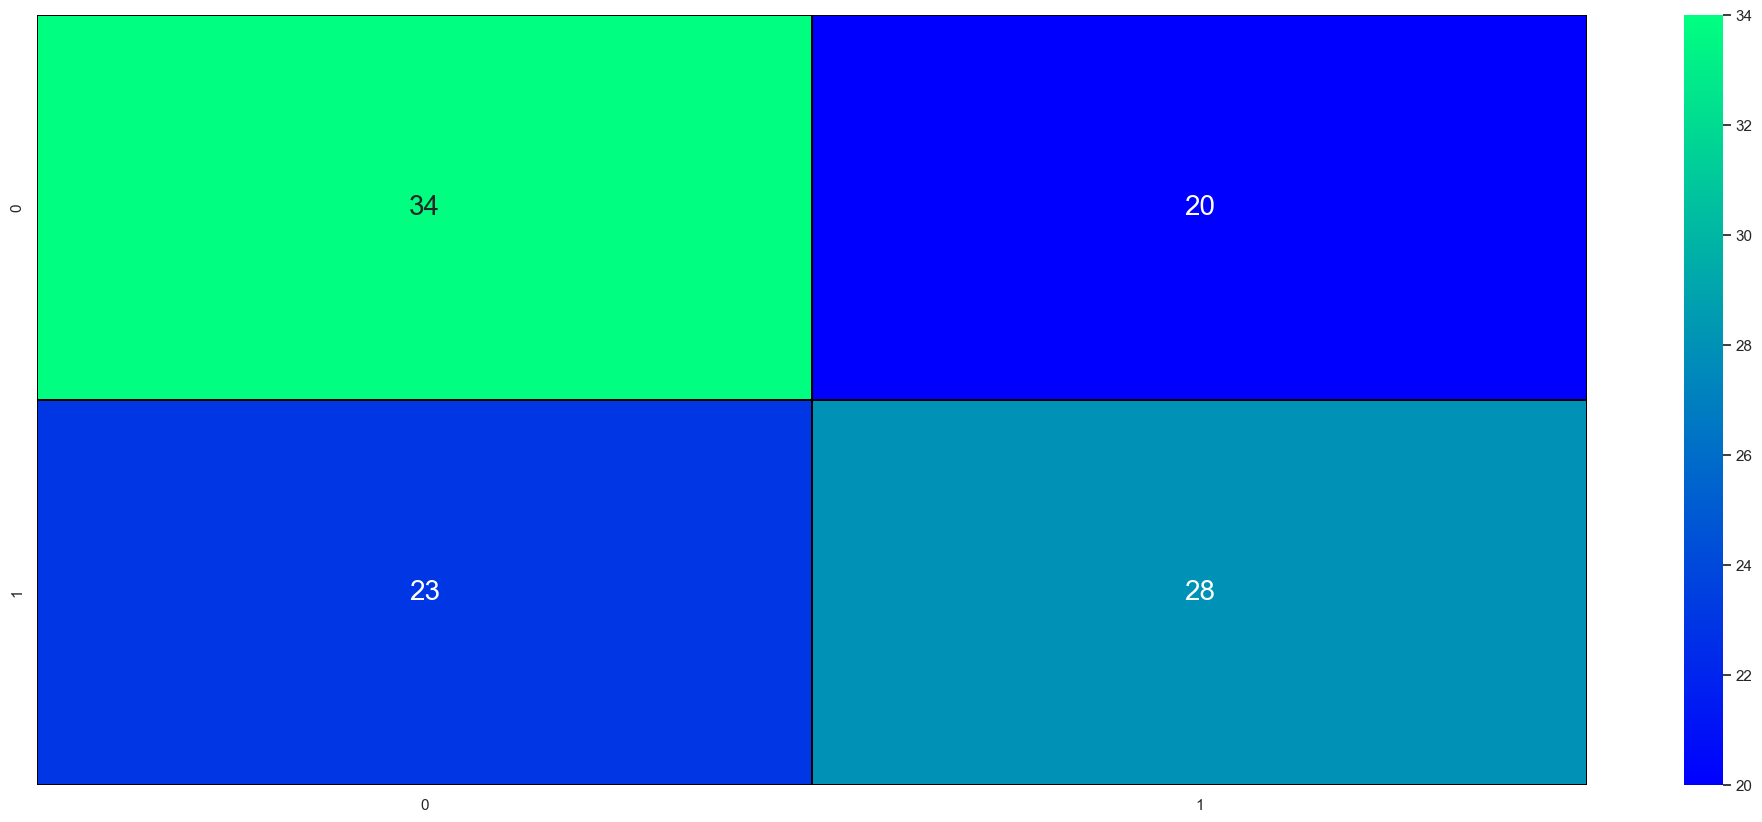

In [47]:
matrix_TP_TN_FN_FP_reg_log(cm)

Verdadeiro Positivo: 12
Verdadeiro Negativo: 10
Falso Negativo: 5
Falso Positivo: 9
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.6111111111111112


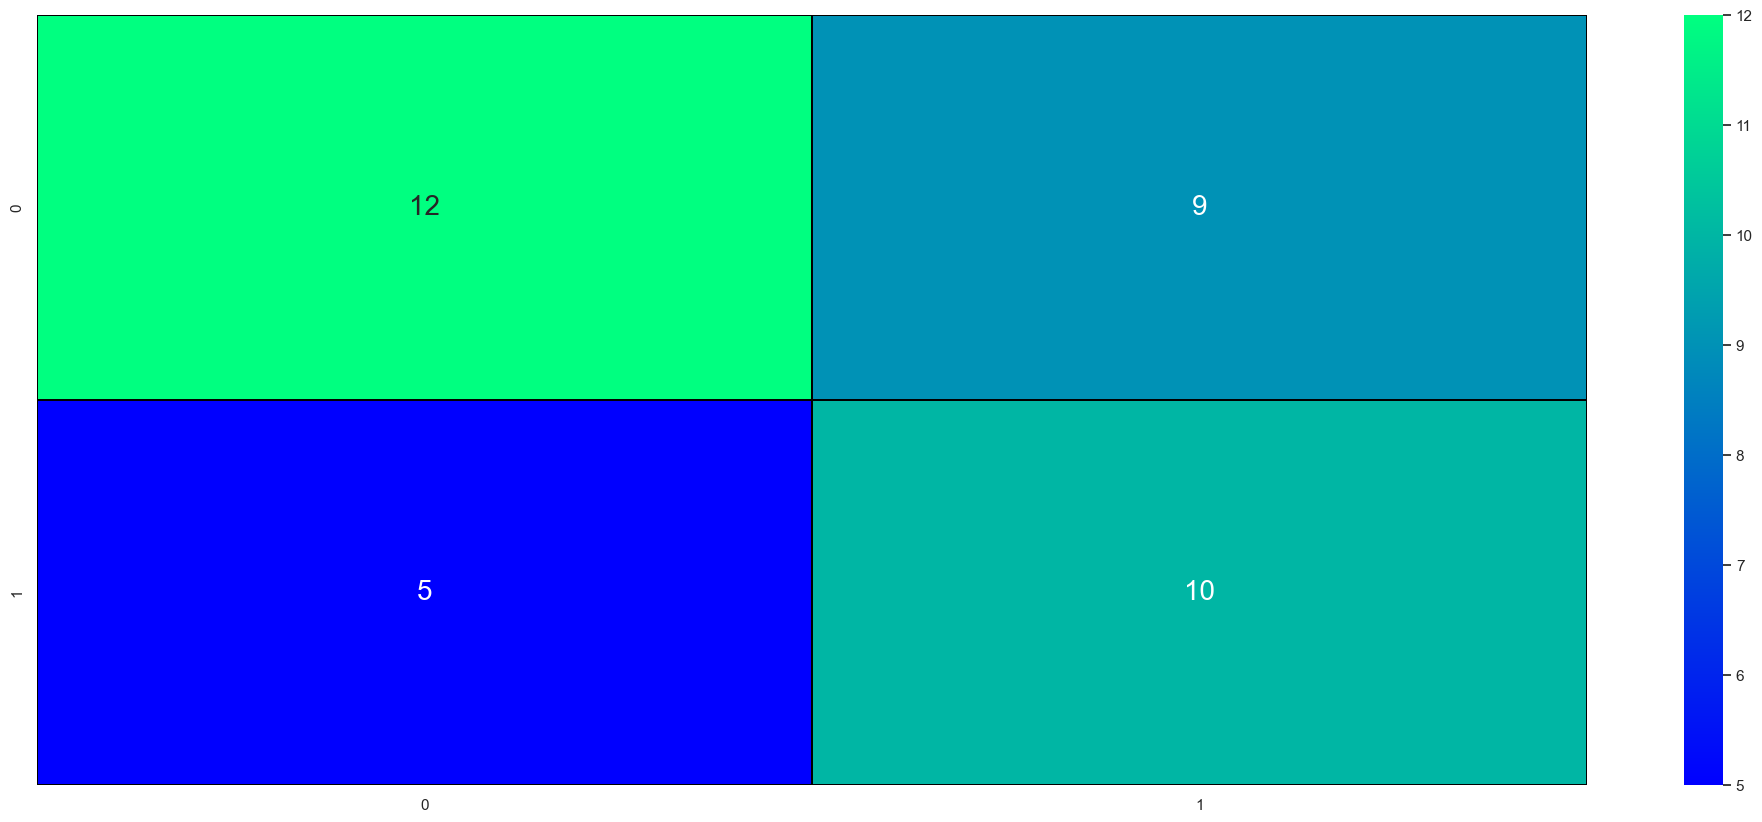

In [48]:
matrix_TP_TN_FN_FP_reg_log(cm_test)


              precision    recall  f1-score   support

           0       0.71      0.57      0.63        21
           1       0.53      0.67      0.59        15

    accuracy                           0.61        36
   macro avg       0.62      0.62      0.61        36
weighted avg       0.63      0.61      0.61        36



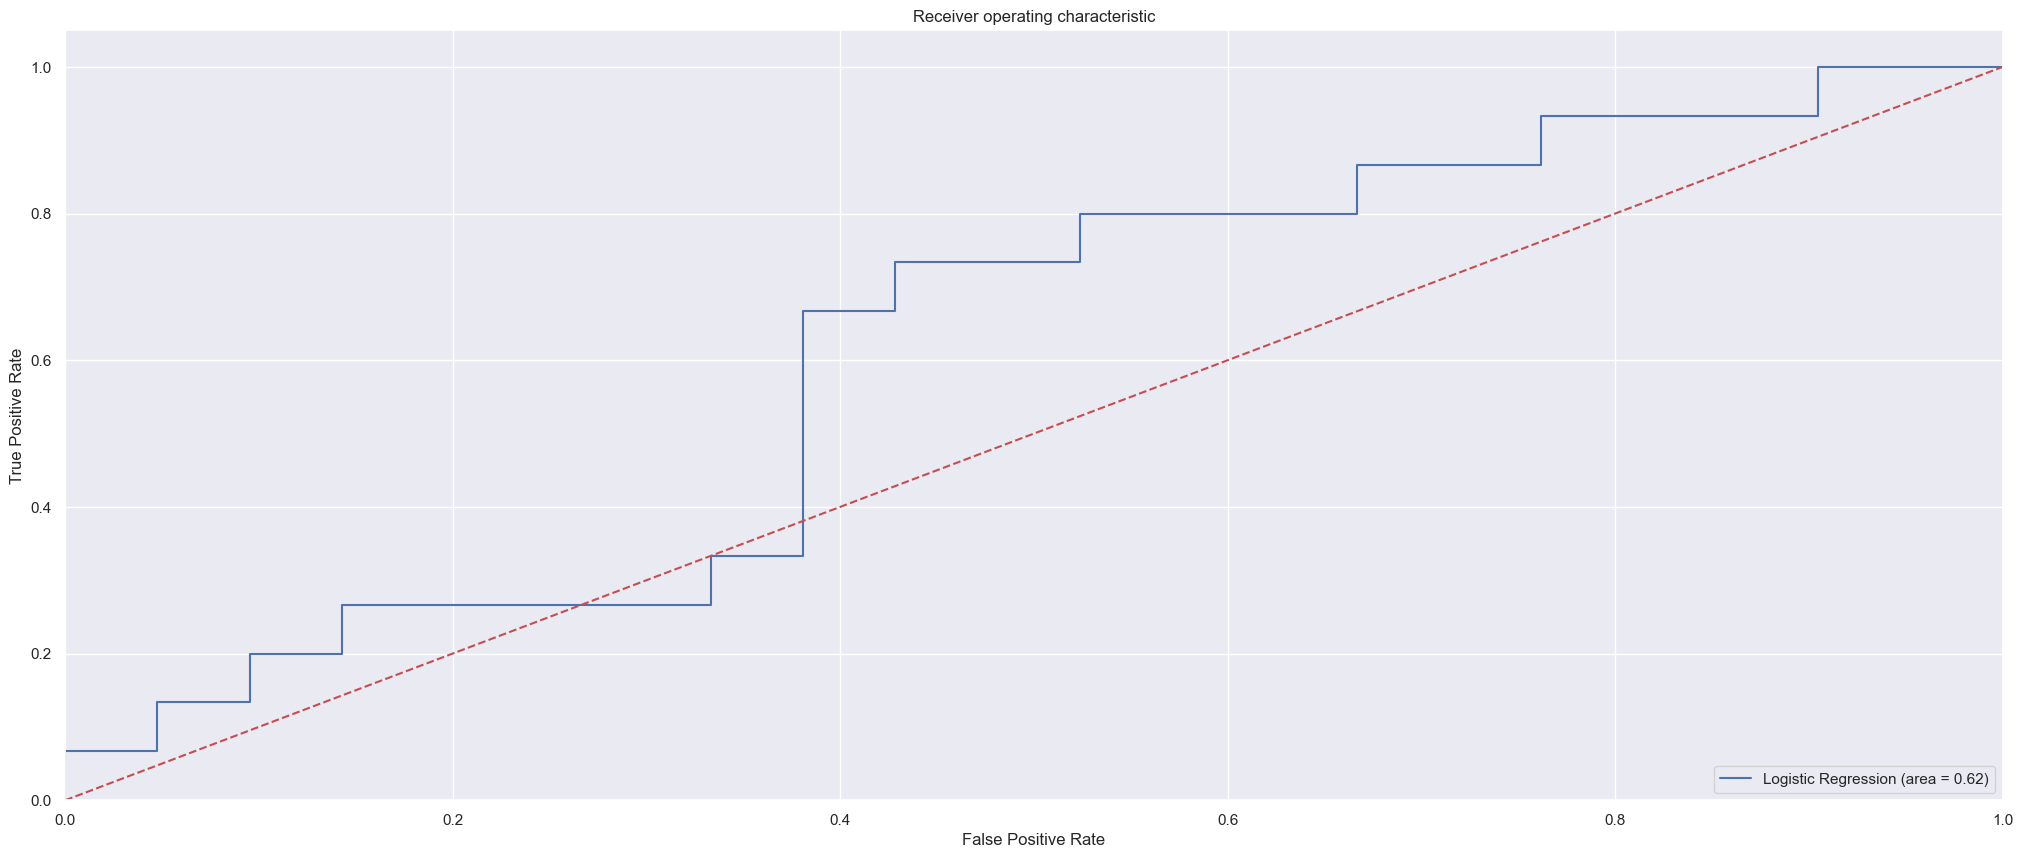

In [49]:
print(class_report)

curve_roc(logit_roc_auc, fpr, tpr)

### Discussão

Tendo em mente os resultados para os dois cenários:
* Toda a serie temporal:

    Aqui vimos que, o nivel de acerto e previsitiblidade não foi Bom,tendo em vista que pela matriz de confusão obtivemos um valor de 51%. A curva ROC também demonstro uma baixa uma performace;
* Fatia de tempo:

    Podemos perceber uma leve melhora frente ao todo o periodo de tempo, por isso o ideal é ter sempre avalições, caso utilize apenas itens referente a ação, de periodos de tempo pequenos.
 

## Árvores de Decisão <a class="anchor" id="4"></a>

Para essa parte do processo, decidiu-se ver uma meneira de decidir se um ativo é bom ou não para a compra. Para isso, pegaremos um perido pequeno de tempo (aproximadamente 180 dias) e faremos o acumulado das variações com uma janela de tempo de 30 dias antes e após o dia avaliado.


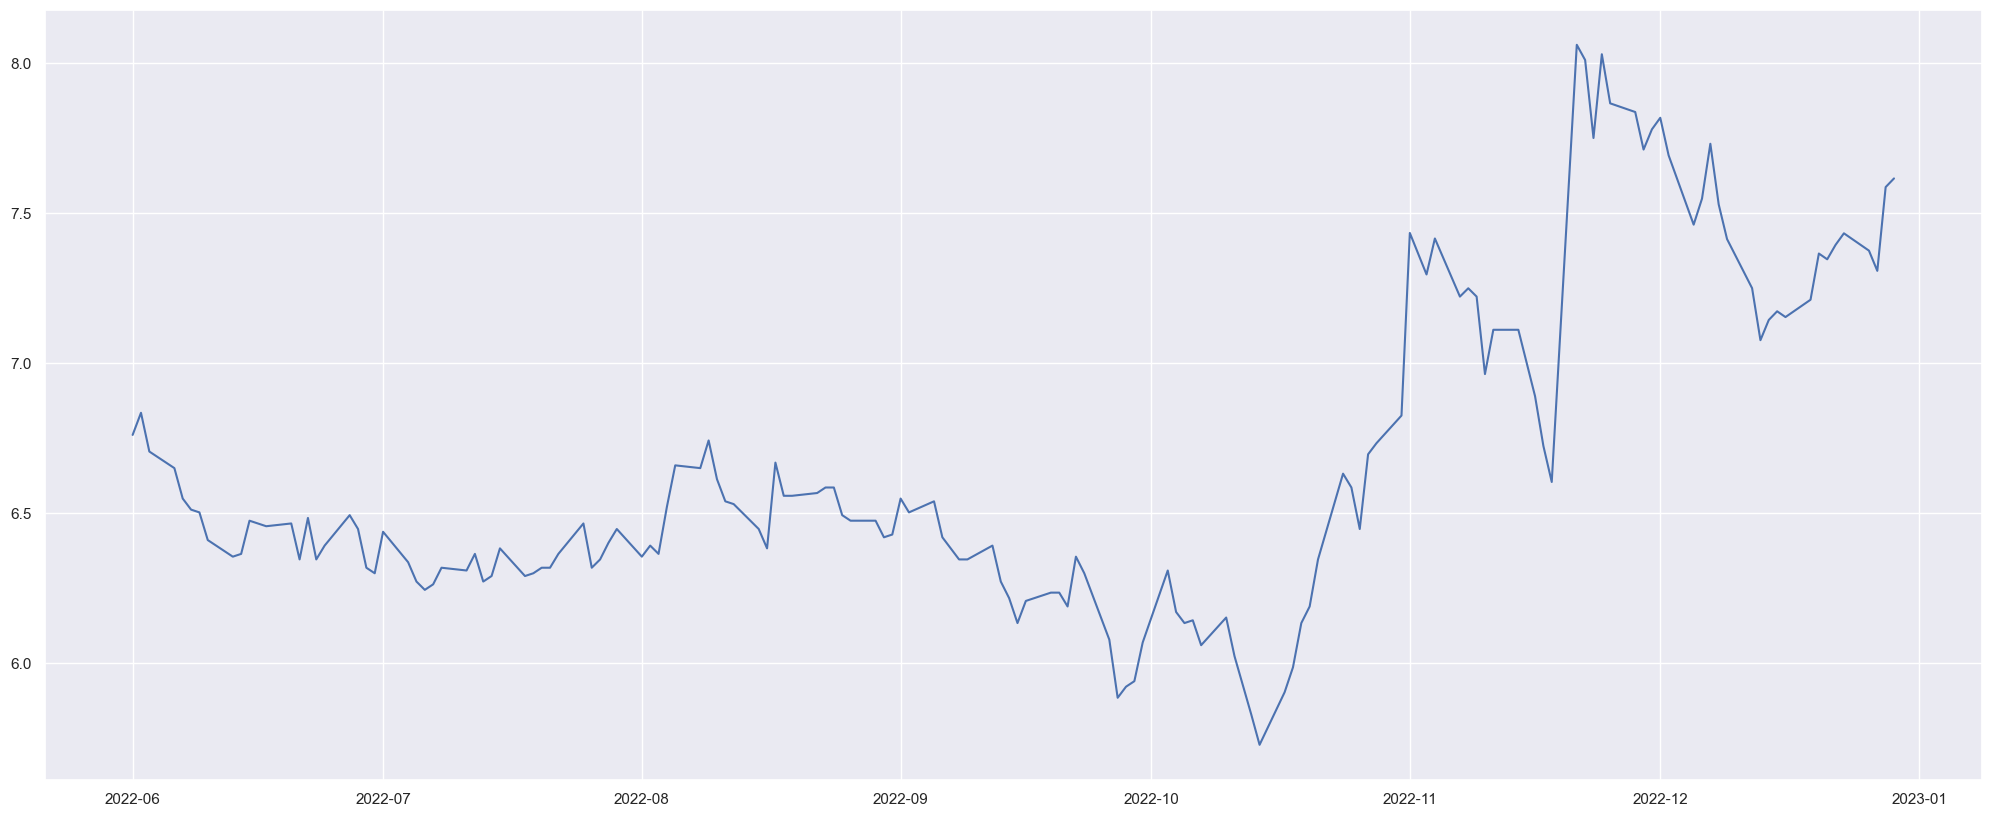

In [50]:
copel_hist = copel.history(start='2022-06-01', end='2023-01-01')
plt.figure(figsize=(25,10))
plt.plot(copel_hist['Close'])

In [51]:
header = ['Open', 'High', 'Low', 'Close', 'Volume']

def prep_tree(df):
    df['Return'] = df['Close'].pct_change(30).shift(-30)
    x = df[header]
    y = np.where(df.Return > 0, 1 , 0)

    return x, y


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

def func_tree(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=300)

    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    classification_report(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

    cm = confusion_matrix(y_test,y_pred)
    data = tree.export_graphviz(clf, filled=True, feature_names=header, class_names=np.array(['compra','venda']))

    return cm, logit_roc_auc, fpr, tpr, data

In [53]:
x, y = prep_tree(copel_hist)

cm, roc, fpr, tpr, graf = func_tree(x, y)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.89      0.71      0.79        24

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



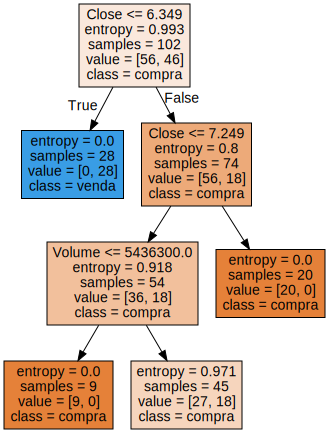

In [54]:
graphviz.Source(graf)

Verdadeiro Positivo: 19
Verdadeiro Negativo: 17
Falso Negativo: 7
Falso Positivo: 2
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.8


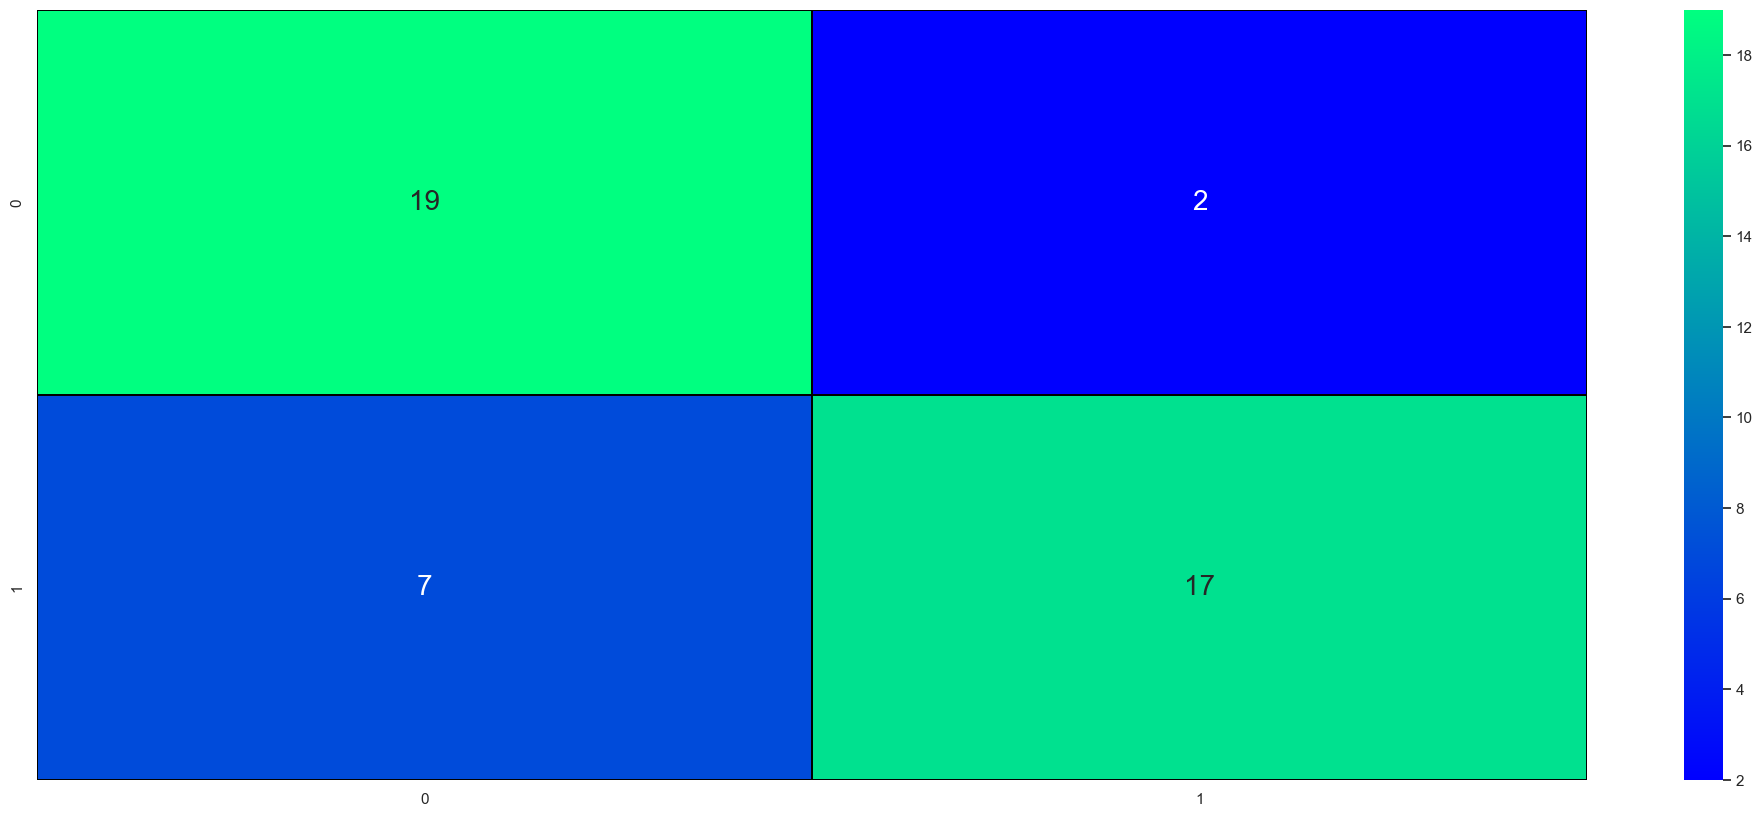

In [55]:
matrix_TP_TN_FN_FP_reg_log(cm)

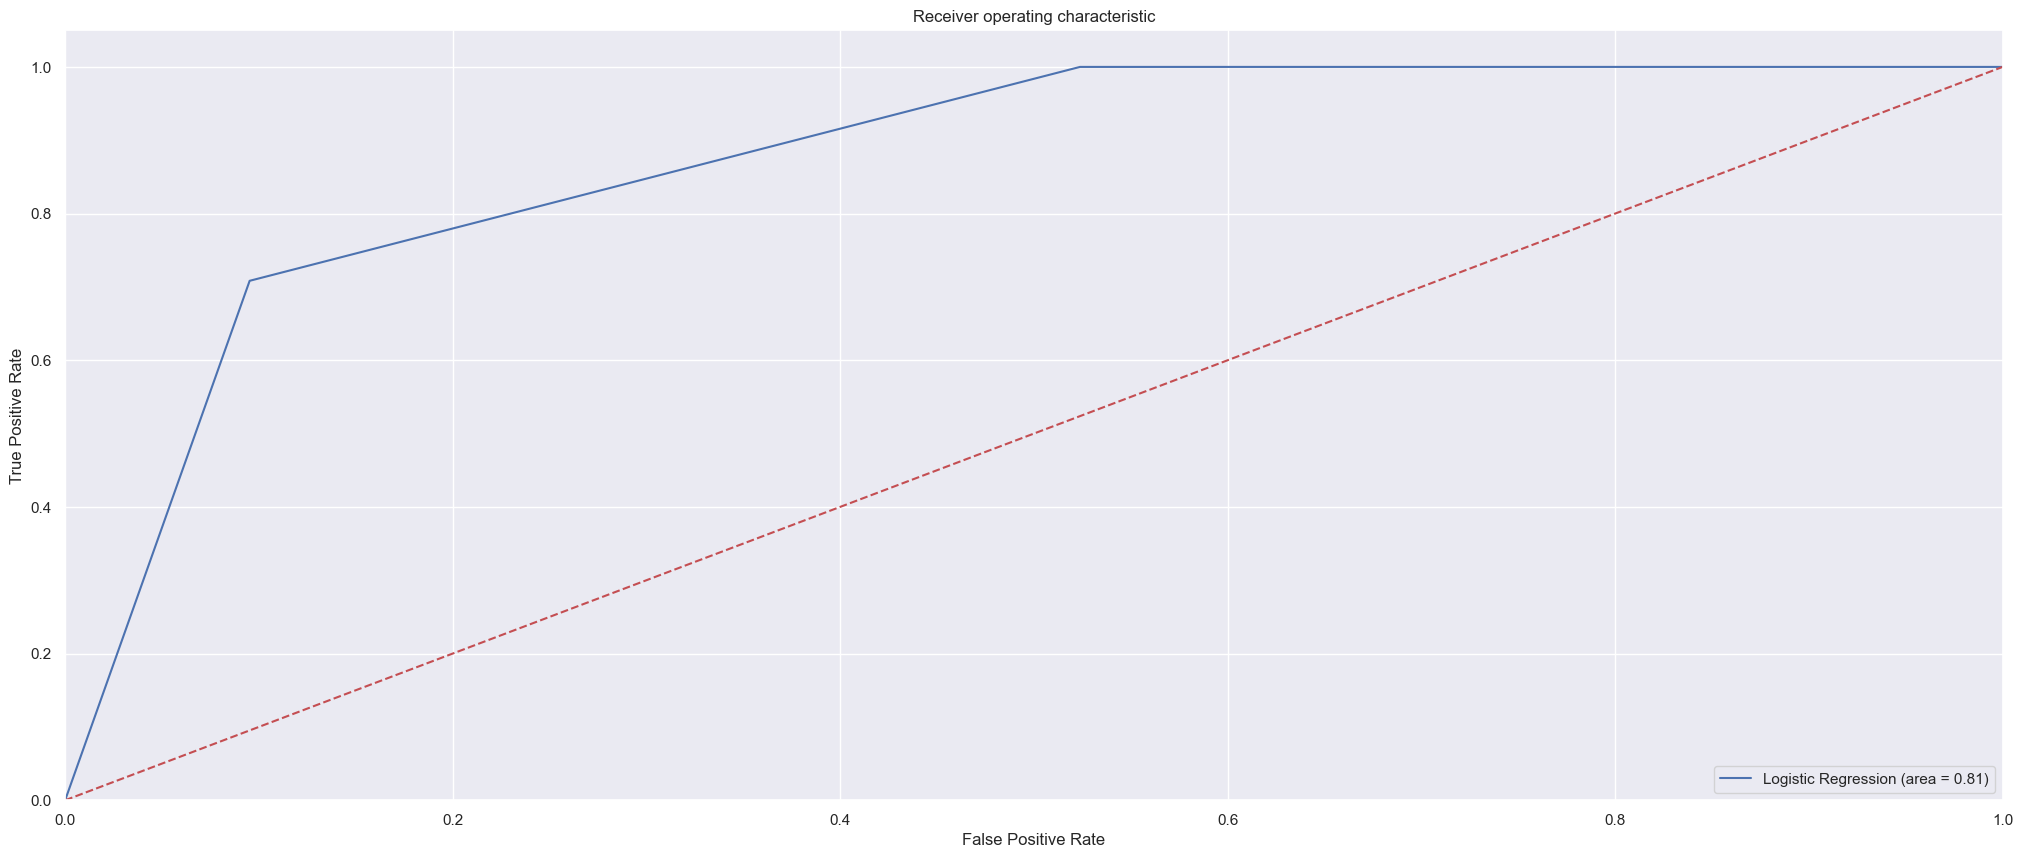

In [56]:
curve_roc(roc, fpr, tpr)

### Discussão

Como visto obtivemos para um periodo de tempo pequeno um nivel de aceitação bom (acima dos 75%). Além disso usamos um grau de profundidade de 3 passos. Novamente aqui a atenção é no intervalo de tempo, de aproximadamente 6 meses, o que é tido como um periodo pequeno frente ao total da amostra.

## Clusterização kmeans e Clusterização Hierárquica <a class="anchor" id="5"></a>

Para a parte de Clusterização, iremos explorar as ações que compoem o indice bovespa (ibovespa), que são 86 empresas. A ideia é ver frente ao valor total do indice Ibovespa como cada ação se comporta.

In [102]:
stock_list = ['RRRP3.SA','ALOS3.SA','ALPA4.SA','ABEV3.SA','ARZZ3.SA','ASAI3.SA','AZUL4.SA','B3SA3.SA','BBSE3.SA','BBDC3.SA','BBDC4.SA','BRAP4.SA','BBAS3.SA','BRKM5.SA','BRFS3.SA','BPAC11.SA',
              'CRFB3.SA','BHIA3.SA','CCRO3.SA','CMIG4.SA','CIEL3.SA','COGN3.SA','CPLE6.SA','CSAN3.SA','CPFE3.SA','CMIN3.SA','CVCB3.SA','CYRE3.SA','DXCO3.SA','ELET3.SA','ELET6.SA','EMBR3.SA',
              'ENGI11.SA','ENEV3.SA','EGIE3.SA','EQTL3.SA','EZTC3.SA','FLRY3.SA','GGBR4.SA','GOAU4.SA','GOLL4.SA','NTCO3.SA','SOMA3.SA','HAPV3.SA','HYPE3.SA','IGTI11.SA','IRBR3.SA','ITSA4.SA',
              'ITUB4.SA','JBSS3.SA','KLBN11.SA','RENT3.SA','LWSA3.SA','LREN3.SA','MGLU3.SA','MRFG3.SA','BEEF3.SA','MRVE3.SA','MULT3.SA','PCAR3.SA','PETR3.SA','PETR4.SA','RECV3.SA','PRIO3.SA',
              'PETZ3.SA','RADL3.SA','RAIZ4.SA','RDOR3.SA','RAIL3.SA','SBSP3.SA','SANB11.SA','SMTO3.SA','CSNA3.SA','SLCE3.SA','SUZB3.SA','TAEE11.SA','VIVT3.SA','TIMS3.SA','TOTS3.SA','UGPA3.SA',
              'USIM5.SA','VALE3.SA','VAMO3.SA','VBBR3.SA','WEGE3.SA','YDUQ3.SA']

data_start = '2020-01-01'

multi_data = yf.download(stock_list, start=data_start)
ibov = yf.download('^BVSP', start=data_start)


[*********************100%%**********************]  86 of 86 completed
[*********************100%%**********************]  1 of 1 completed


In [103]:
def calc_annualized_returns(returns):
    total_returns = (1 + returns.pct_change()).cumprod()
    annualized_return = (1 + total_returns) ** (1/2) - 1
    return annualized_return.max()

def calc_annual_volatility(returns):
    return returns.std() * np.sqrt(len(returns))

In [104]:
new_df = []

market_returns = (ibov['Close']/ibov['Open']).pct_change()

for stock in stock_list:

    returns = (multi_data['Close'][stock]/multi_data['Open'][stock]).dropna() 

    ann_vol = calc_annual_volatility(returns)
    ann_returns = calc_annualized_returns(returns)
    excess_returns = returns.pct_change() - market_returns
    annual_beta = (abs(excess_returns.max()/excess_returns.min()))
    
    new_df.append({'stock':stock, 'ann_returns':ann_returns, 'ann_vol':ann_vol, 'annual_beta':annual_beta})

clustering_df = pd.DataFrame(new_df, columns=['stock', 'ann_returns', 'ann_vol', 'annual_beta'])

clustering_df.set_index('stock', inplace = True)

*_Observação_*: O Beta quando mais proximo a 1 indica alta volatilidade e risco e quanto mais longe menor volatilidade e risco da ação.

In [134]:
from sklearn.cluster import KMeans
import plotly.express as px


km = KMeans(n_clusters=3, random_state = 99, max_iter=300, n_init=10)
km.fit(clustering_df)
labels = km.predict(clustering_df)
centroids = km.cluster_centers_
clustering_df['clusters'] = km.labels_

fig = px.scatter(clustering_df, x='ann_returns', y='ann_vol', color='clusters', title='Clusters: Volatilidade anual VS Retorno anual')
fig.show()

## Vizinhos mais próximos (kNN) <a class="anchor" id="6"></a>

Para o metodo dos vizinhos mais proximos, utilizou-se o cluster anterior, mas não dividindo em 3 grupos e sim em 2.

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = list(range(1, 25))
training_error = []
testing_error = []

x = clustering_df[['ann_returns', 'ann_vol', 'annual_beta']]
y  = [1 if i > 0 else 0 for i in clustering_df['clusters']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 65,random_state = 42)

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    y_pred_class = knn.predict(x)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = knn.predict(x_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

column_dict = {'K': k_range, 'erro de treinamento':training_error, 'erro de teste':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_values(by = ['erro de treinamento', 'erro de teste'])
print (f"O melhor K é {df.index[0]}")

O melhor K é 3


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.83      1.00      0.91        15

    accuracy                           0.86        21
   macro avg       0.92      0.75      0.79        21
weighted avg       0.88      0.86      0.84        21

Verdadeiro Positivo: 3
Verdadeiro Negativo: 15
Falso Negativo: 0
Falso Positivo: 3
Teste de Acuracia (TP+TN)/(TP+TN+FN+FP): 0.8571428571428571


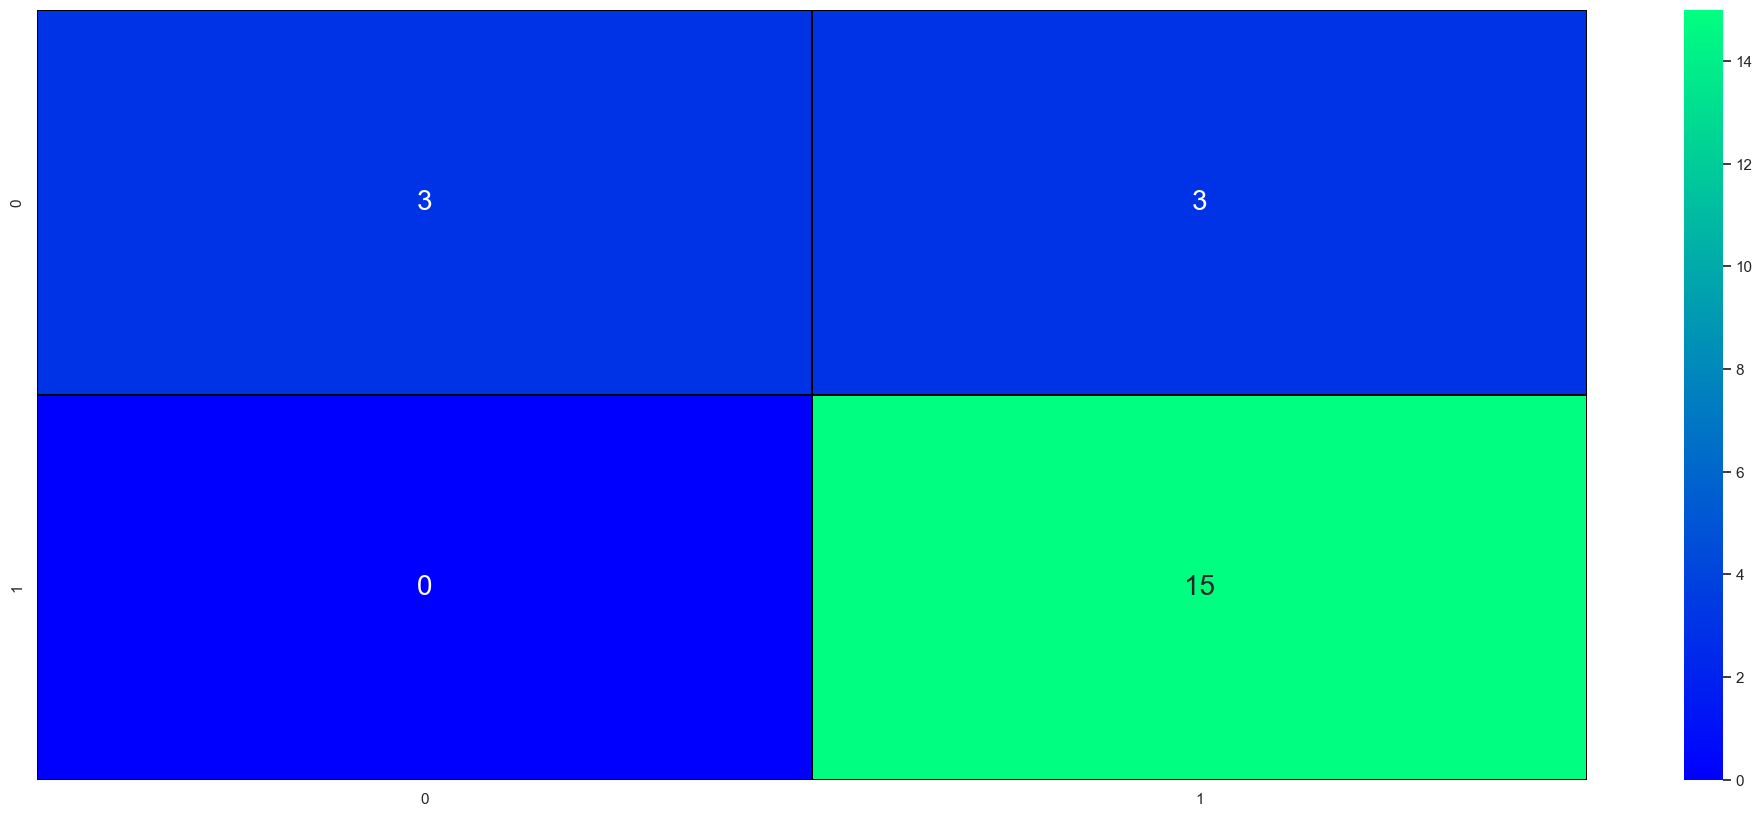

In [138]:
knn = KNeighborsClassifier(n_neighbors=df.index[0])
knn.fit(x_train, y_train)

knn_y_pred = knn.predict(x_test)
print(classification_report(y_test, knn_y_pred))


cm = confusion_matrix(y_test, knn_y_pred)
matrix_TP_TN_FN_FP_reg_log(cm)


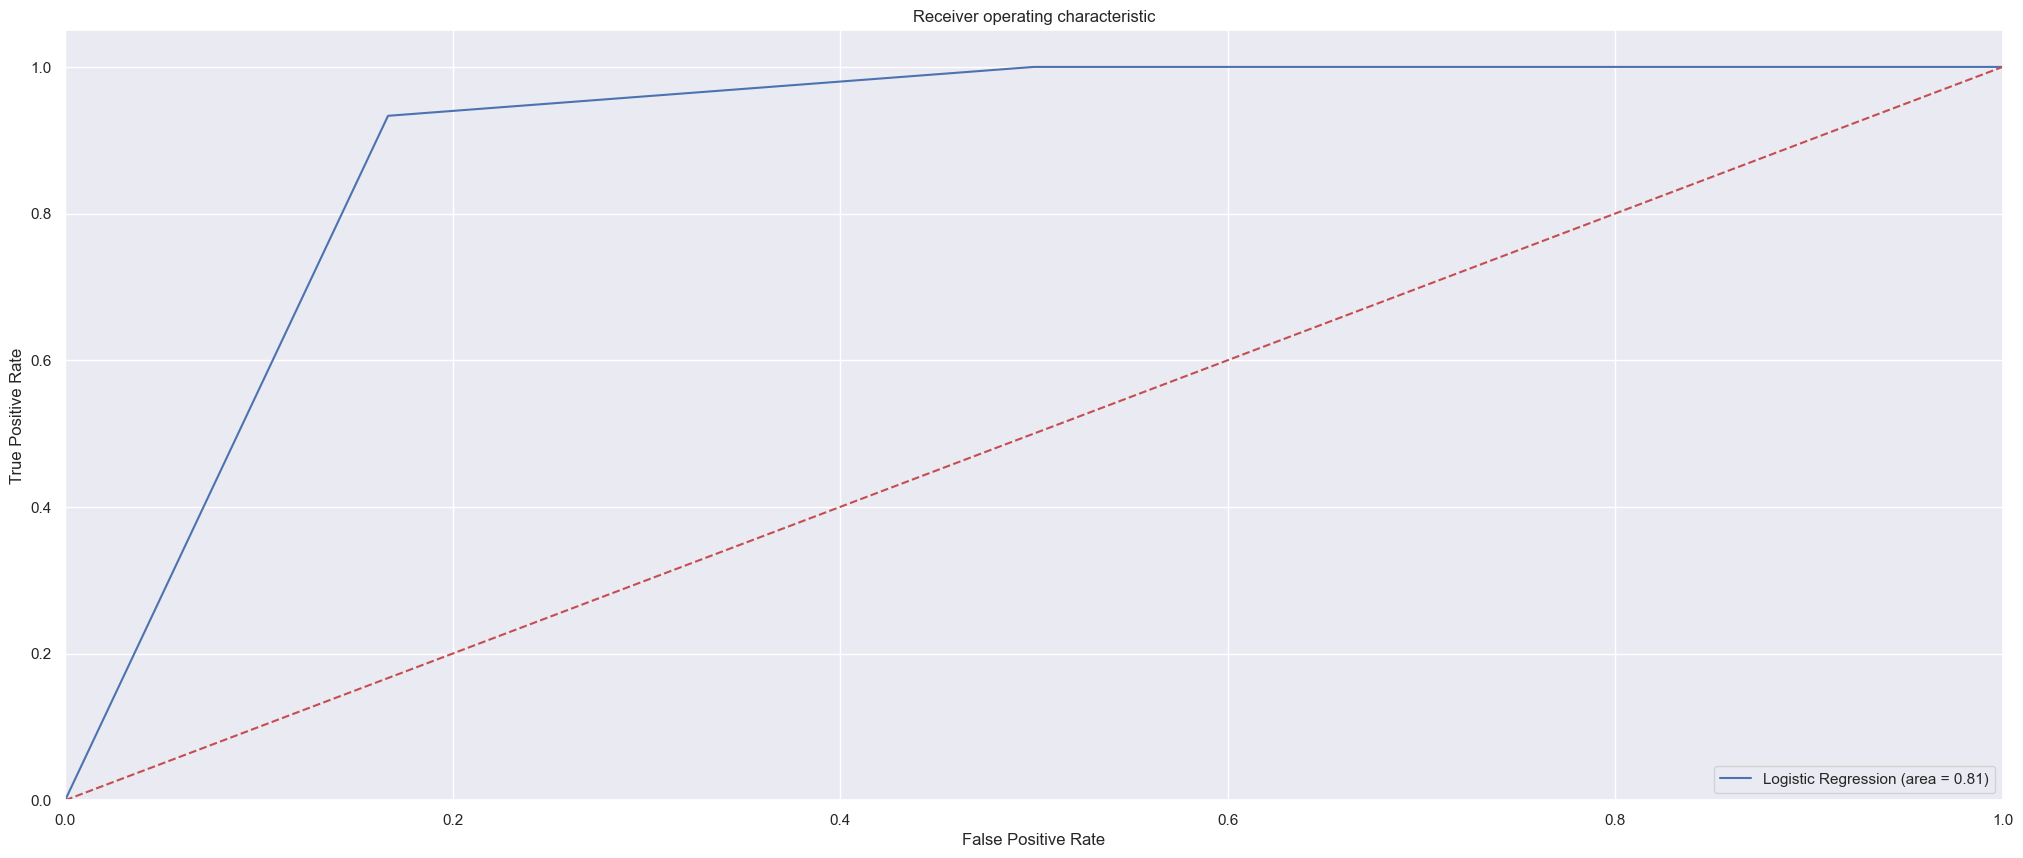

In [139]:
logit_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
curve_roc(roc, fpr, tpr)

### Discussão

Para uma amostra pequena, o resultado foi satisfatório, porém é importante relatar que para novas interações, seria necessário uma maior ordem de interações.


## Conclusão <a class="anchor" id="7"></a>

Para a proposta do trabalho:
* Explorou-se diferentes bases dados referente a ações;
* Foi visto as tecnicas aplicadas durante a aula;
* Permitiu-se explorar a ferramenta python;

Dos resultados gerais:
* Sobre os Resutados, viu-se que o mercado financeiro é diretamente ligado ao tempo que é avaliado, portanto seria necessário aplicar dados externos para trazer resultados com maior acerto. 
* Para o trabalho ter mais significado, seria interessante ter um economista junto ao trabalho, pois poderia ter uma ideias e ponderações melhores (questão da multidisciplinaridade nos times de trabalho).
* Foi possivel explorar as tecnicas e ter noção que em muitos casos é necessário muito trabalho e tratamento antes da avaliação do resultado.
